### 指定数据

此模块有3个需要自己定义的参数

1. `mydir`: 数据存放的路径。
2. `labelf`: 每个样本的标注信息文件。
3. `labels`: 要让AI系统学习的目标，例如肿瘤的良恶性、T-stage等。

In [1]:
import os
import pandas as pd
from IPython.display import display
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
from onekey_algo import OnekeyDS as okds
from onekey_algo import get_param_in_cwd

os.makedirs('img', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('features', exist_ok=True)

# 设置任务Task前缀
task_type = 'Path_'
# 设置数据目录
# mydir = r'你自己数据的路径'
mydir = get_param_in_cwd('radio_dir')
if mydir == okds.ct:
    print(f'正在使用Onekey数据：{okds.ct}，如果不符合预期，请修改目录位置！')
# 对应的标签文件
group_info = get_param_in_cwd('dataset_column') or 'group'
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
# 读取标签数据列名
labels = [get_param_in_cwd('task_column') or 'label']

In [2]:
from collections import namedtuple
import onekey_algo.custom.components as okcomp
from onekey_algo import OnekeyDS as okds
from onekey_algo.custom.utils import print_join_info
from onekey_algo import get_param_in_cwd

import pandas as pd
import numpy as np
import os
os.makedirs('img', exist_ok=True)
os.makedirs('features', exist_ok=True)

ftype = ''
prob_histo = pd.read_csv(f'features/path_prob_histogram{ftype}.csv')
prob_tfidf = pd.read_csv(f'features/path_prob_tfidf{ftype}.csv')
prob = pd.merge(prob_histo, prob_tfidf, on='ID', how='inner', suffixes=['_histo', '_tfidf'])
prob['ID'] = prob['ID'].astype(str)

pred_histo = pd.read_csv(f'features/path_pred_histogram{ftype}.csv')
pred_tfidf = pd.read_csv(f'features/path_pred_tfidf{ftype}.csv')
pred = pd.merge(pred_histo, pred_tfidf, on='ID', how='inner', suffixes=['_histo', '_tfidf'])
pred['ID'] = pred['ID'].astype(str)

rad_data = pd.merge(prob, pred, on='ID', how='inner')
rad_data.to_csv(f'features/path_features{ftype}.csv', index=False, header=True)
labels = ['label']
featrues_not_use = ['ID']
rad_data

,ID,prob-0.0,prob-0.1,prob-0.2,prob-0.3,prob-0.4,prob-0.5,prob-0.6,prob-0.7,prob-0.8,...,prob05,prob06,prob07,prob08,prob09,prob10,pred-0,pred-1,pred0,pred1
0,TCGA-BR-6452,0.905,0.075,0.012,0.000,0.004,0.004,0.000,0.000,0.000,...,0.006,0.000,0.000,0.000,0.000,0.000e+00,1.000,0.000,1.000,0.000
1,TCGA-BR-6453,0.827,0.104,0.035,0.017,0.006,0.009,0.003,0.000,0.000,...,0.014,0.005,0.000,0.000,0.000,0.000e+00,0.994,0.006,1.000,0.007
2,TCGA-BR-6455,0.899,0.049,0.014,0.009,0.009,0.005,0.005,0.004,0.004,...,0.007,0.007,0.006,0.006,0.006,9.136e-04,0.982,0.018,1.000,0.023
3,TCGA-BR-6456,0.749,0.079,0.048,0.030,0.032,0.014,0.008,0.012,0.010,...,0.024,0.014,0.023,0.019,0.016,1.739e-02,0.943,0.057,0.997,0.074
4,TCGA-BR-6563,0.662,0.139,0.060,0.041,0.032,0.027,0.013,0.011,0.007,...,0.051,0.026,0.023,0.015,0.013,2.904e-03,0.948,0.052,0.998,0.069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,TCGA-VQ-A925,0.000,0.018,0.030,0.049,0.030,0.037,0.061,0.104,0.110,...,0.069,0.116,0.211,0.227,0.462,8.120e-01,0.146,0.854,0.137,0.991
162,TCGA-VQ-A927,0.050,0.075,0.050,0.050,0.050,0.025,0.025,0.050,0.175,...,0.049,0.050,0.107,0.381,0.228,8.618e-01,0.275,0.725,0.292,0.956
163,TCGA-VQ-A92D,0.575,0.150,0.075,0.058,0.025,0.025,0.000,0.025,0.017,...,0.053,0.000,0.058,0.039,0.082,4.447e-02,0.892,0.108,0.989,0.149
164,TCGA-VQ-A94O,0.641,0.174,0.051,0.053,0.023,0.026,0.020,0.008,0.000,...,0.050,0.039,0.016,0.000,0.010,3.637e-03,0.959,0.041,0.999,0.052


## 标注数据

数据以csv格式进行存储，这里如果是其他格式，可以使用自定义函数读取出每个样本的结果。

要求label_data为一个`DataFrame`格式，包括ID列以及后续的labels列，可以是多列，支持Multi-Task。

In [3]:
from onekey_algo.custom.components.comp1 import fillna
label_data = pd.read_csv(labelf)[['ID', 'group']]
joinit_id = pd.read_csv('data/survival.csv').dropna()
label_data = pd.merge(joinit_id, label_data )
label_data = fillna(label_data, fill_mod='50%')
# rad_group = pd.read_csv('data/rad_group.csv')
# label_data = pd.merge(label_data, rad_group[['ID']], on='ID', how='inner')
label_data

,ID,OS,OSTime,group
0,TCGA-BR-8368,0,131,test
1,TCGA-D7-8575,1,554,train
2,TCGA-VQ-A925,1,138,train
3,TCGA-RD-A7BT,1,262,train
4,TCGA-CD-A4MG,1,200,train
...,...,...,...,...
160,TCGA-RD-A8N6,1,272,train
161,TCGA-HU-A4GN,0,912,train
162,TCGA-BR-8484,1,766,test
163,TCGA-RD-A8NB,1,513,train


## 特征拼接 

将标注数据`label_data`与`rad_data`进行合并，得到训练数据。

**注意：** 
1. 需要删掉ID这一列
2. 如果发现数据少了，需要自行检查数据是否匹配。

In [4]:
from onekey_algo.custom.utils import print_join_info

event_col = get_param_in_cwd('event_col', 'OS')
duration_col=get_param_in_cwd('duration_col', 'OSTime')

print_join_info(rad_data, joinit_id)
combined_data = pd.merge(rad_data, label_data, on=['ID'], how='inner')
print(combined_data[event_col].value_counts())
combined_data

[2024-02-07 14:17:09 - __init__.py:  57]	WARNING	存在ID特征不完全匹配的问题！在左边不在右边的ID：{'TCGA-BR-A4QI'}；在右边不在左边的ID：{'TCGA-BR-4267', 'TCGA-BR-4253', 'TCGA-CG-5721', 'TCGA-CG-4437', 'TCGA-BR-A4QL', 'TCGA-CG-5733'}


0    93
1    72
Name: OS, dtype: int64


,ID,prob-0.0,prob-0.1,prob-0.2,prob-0.3,prob-0.4,prob-0.5,prob-0.6,prob-0.7,prob-0.8,...,prob08,prob09,prob10,pred-0,pred-1,pred0,pred1,OS,OSTime,group
0,TCGA-BR-6452,0.905,0.075,0.012,0.000,0.004,0.004,0.000,0.000,0.000,...,0.000,0.000,0.000e+00,1.000,0.000,1.000,0.000,0,1055,test
1,TCGA-BR-6453,0.827,0.104,0.035,0.017,0.006,0.009,0.003,0.000,0.000,...,0.000,0.000,0.000e+00,0.994,0.006,1.000,0.007,0,389,train
2,TCGA-BR-6455,0.899,0.049,0.014,0.009,0.009,0.005,0.005,0.004,0.004,...,0.006,0.006,9.136e-04,0.982,0.018,1.000,0.023,1,422,train
3,TCGA-BR-6456,0.749,0.079,0.048,0.030,0.032,0.014,0.008,0.012,0.010,...,0.019,0.016,1.739e-02,0.943,0.057,0.997,0.074,1,526,test
4,TCGA-BR-6563,0.662,0.139,0.060,0.041,0.032,0.027,0.013,0.011,0.007,...,0.015,0.013,2.904e-03,0.948,0.052,0.998,0.069,0,1190,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,TCGA-VQ-A925,0.000,0.018,0.030,0.049,0.030,0.037,0.061,0.104,0.110,...,0.227,0.462,8.120e-01,0.146,0.854,0.137,0.991,1,138,train
161,TCGA-VQ-A927,0.050,0.075,0.050,0.050,0.050,0.025,0.025,0.050,0.175,...,0.381,0.228,8.618e-01,0.275,0.725,0.292,0.956,1,200,test
162,TCGA-VQ-A92D,0.575,0.150,0.075,0.058,0.025,0.025,0.000,0.025,0.017,...,0.039,0.082,4.447e-02,0.892,0.108,0.989,0.149,0,352,train
163,TCGA-VQ-A94O,0.641,0.174,0.051,0.053,0.023,0.026,0.020,0.008,0.000,...,0.000,0.010,3.637e-03,0.959,0.041,0.999,0.052,1,640,train


## 正则化

`normalize_df` 为onekey中正则化的API，将数据变化到0均值1方差。正则化的方法为

$column = \frac{column - mean}{std}$

In [5]:
from onekey_algo.custom.components.comp1 import normalize_df
data = normalize_df(combined_data, not_norm=['ID', event_col, duration_col], group='group', use_train=True)
data = data.dropna(axis=1)
data.describe()

[2024-02-07 14:17:09 - comp1.py: 186]	INFO	正在使用训练集预定数据进行标准化。


,prob-0.0,prob-0.1,prob-0.2,prob-0.3,prob-0.4,prob-0.5,prob-0.6,prob-0.7,prob-0.8,prob-0.9,...,prob07,prob08,prob09,prob10,pred-0,pred-1,pred0,pred1,OS,OSTime
count,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,...,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000
mean,-0.032,0.065,0.019,0.195,0.047,0.026,0.008,0.070,0.080,-0.027,...,0.101,0.145,0.030,-0.023,0.029,-0.029,0.074,0.004,0.436,573.461
std,0.969,0.917,0.911,1.212,1.026,0.952,0.878,1.039,1.083,0.898,...,1.059,1.189,0.948,0.928,0.901,0.901,0.893,0.933,0.497,490.807
min,-1.482,-0.916,-0.803,-0.729,-0.544,-0.651,-0.476,-0.663,-0.686,-0.613,...,-0.562,-0.646,-0.589,-0.558,-2.235,-0.705,-2.311,-0.744,0.000,3.000
25%,-0.953,-0.553,-0.552,-0.626,-0.544,-0.651,-0.476,-0.663,-0.686,-0.613,...,-0.562,-0.646,-0.589,-0.558,-0.235,-0.682,0.199,-0.720,0.000,272.000
50%,0.140,-0.013,-0.177,-0.192,-0.277,-0.263,-0.227,-0.441,-0.499,-0.553,...,-0.393,-0.501,-0.540,-0.558,0.496,-0.496,0.558,-0.510,0.000,476.000
75%,0.833,0.451,0.301,0.542,0.188,0.272,0.219,0.487,0.631,0.300,...,0.288,0.495,0.404,-0.031,0.682,0.235,0.570,0.497,1.000,762.000
max,1.339,7.971,5.961,6.180,6.504,5.813,8.791,4.321,3.884,3.298,...,5.020,5.043,3.569,2.256,0.705,2.235,0.570,1.822,1.000,3540.000


In [6]:
from onekey_algo.custom.components.comp1 import normalize_df, select_feature

corr_name = get_param_in_cwd('corr_name', 'pearson')
if os.path.exists(f'features/{task_type}_features_sel.csv') and False:
    data = pd.read_csv(f'features/{task_type}_features_sel.csv', header=0)
else:
    sel_feature = select_feature(data[[c for c in data.columns if c not in [event_col, duration_col]]].corr(corr_name), 
                                 threshold=0.8, topn=10, verbose=False)
    data = data[['ID'] + sel_feature + [event_col, duration_col, 'group']]
    data.to_csv(f'features/{task_type}_features_sel.csv', header=True, index=False)
data

,ID,prob01,prob02,prob03,prob04,prob05,prob06,prob07,prob08,pred1,OS,OSTime,group
0,TCGA-BR-6452,-0.463,-0.667,-0.647,-0.540,-0.521,-0.537,-0.562,-0.646,-0.744,0,1055,test
3,TCGA-BR-6456,-0.331,-0.262,-0.141,-0.187,-0.329,-0.400,-0.320,-0.441,-0.553,1,526,test
5,TCGA-BR-6564,1.358,0.912,1.531,0.180,1.045,0.808,0.456,1.533,0.352,1,224,test
7,TCGA-BR-6566,0.938,0.072,0.642,0.134,0.229,0.140,0.288,0.162,-0.064,0,997,test
12,TCGA-BR-7196,0.585,-0.185,0.069,-0.163,-0.121,-0.392,-0.477,-0.472,-0.537,0,666,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,TCGA-VQ-A91D,-0.033,1.339,1.014,1.649,3.286,2.555,2.747,2.707,1.388,1,356,train
159,TCGA-VQ-A924,0.785,-0.005,-0.127,-0.329,-0.211,-0.361,-0.148,-0.436,-0.495,1,1686,train
160,TCGA-VQ-A925,-0.805,-0.426,0.238,-0.178,0.130,0.586,1.685,1.765,1.799,1,138,train
162,TCGA-VQ-A92D,0.530,0.212,0.561,-0.203,-0.026,-0.537,0.057,-0.227,-0.361,0,352,train


## 构建数据

将样本的训练数据X与监督信息y分离出来，并且对训练数据进行划分，一般的划分原则为80%-20%

In [7]:
import numpy as np
import onekey_algo.custom.components as okcomp
from collections import OrderedDict


train_data = data[(data[group_info] == 'train')]

# subsets = [s for s in label_data['group'].value_counts().index if s != 'train']
subsets = ['train', 'test']
val_datasets = OrderedDict()
for subset in subsets:
    val_data = data[data[group_info] == subset]
    val_datasets[subset] = val_data
    val_data.to_csv(f'features/{task_type}_{subset}_features_norm.csv', index=False)

print('，'.join([f"{subset}样本数：{d_.shape}" for subset, d_ in val_datasets.items()]))

train样本数：(115, 13)，test样本数：(50, 13)


In [8]:
# from onekey_algo.custom.components.survival import uni_cox

# if os.path.exists(f'features/{task_type}path_features_unisel.csv') and False:
#     train_data = pd.read_csv(f'features/{task_type}path_features_unisel.csv')
# else:
#     sel_features = uni_cox(train_data, duration_col=duration_col, event_col=event_col,
#                            cols=[c for c in train_data.columns if c not in [event_col, duration_col, 'ID', 'group']], 
#                            verbose=True)
#     train_data = train_data[['ID'] + sel_features + [event_col, duration_col, 'group']]
#     train_data.to_csv(f'features/{task_type}path_features_unisel.csv', header=True, index=False)
# train_data

### Lasso -COX

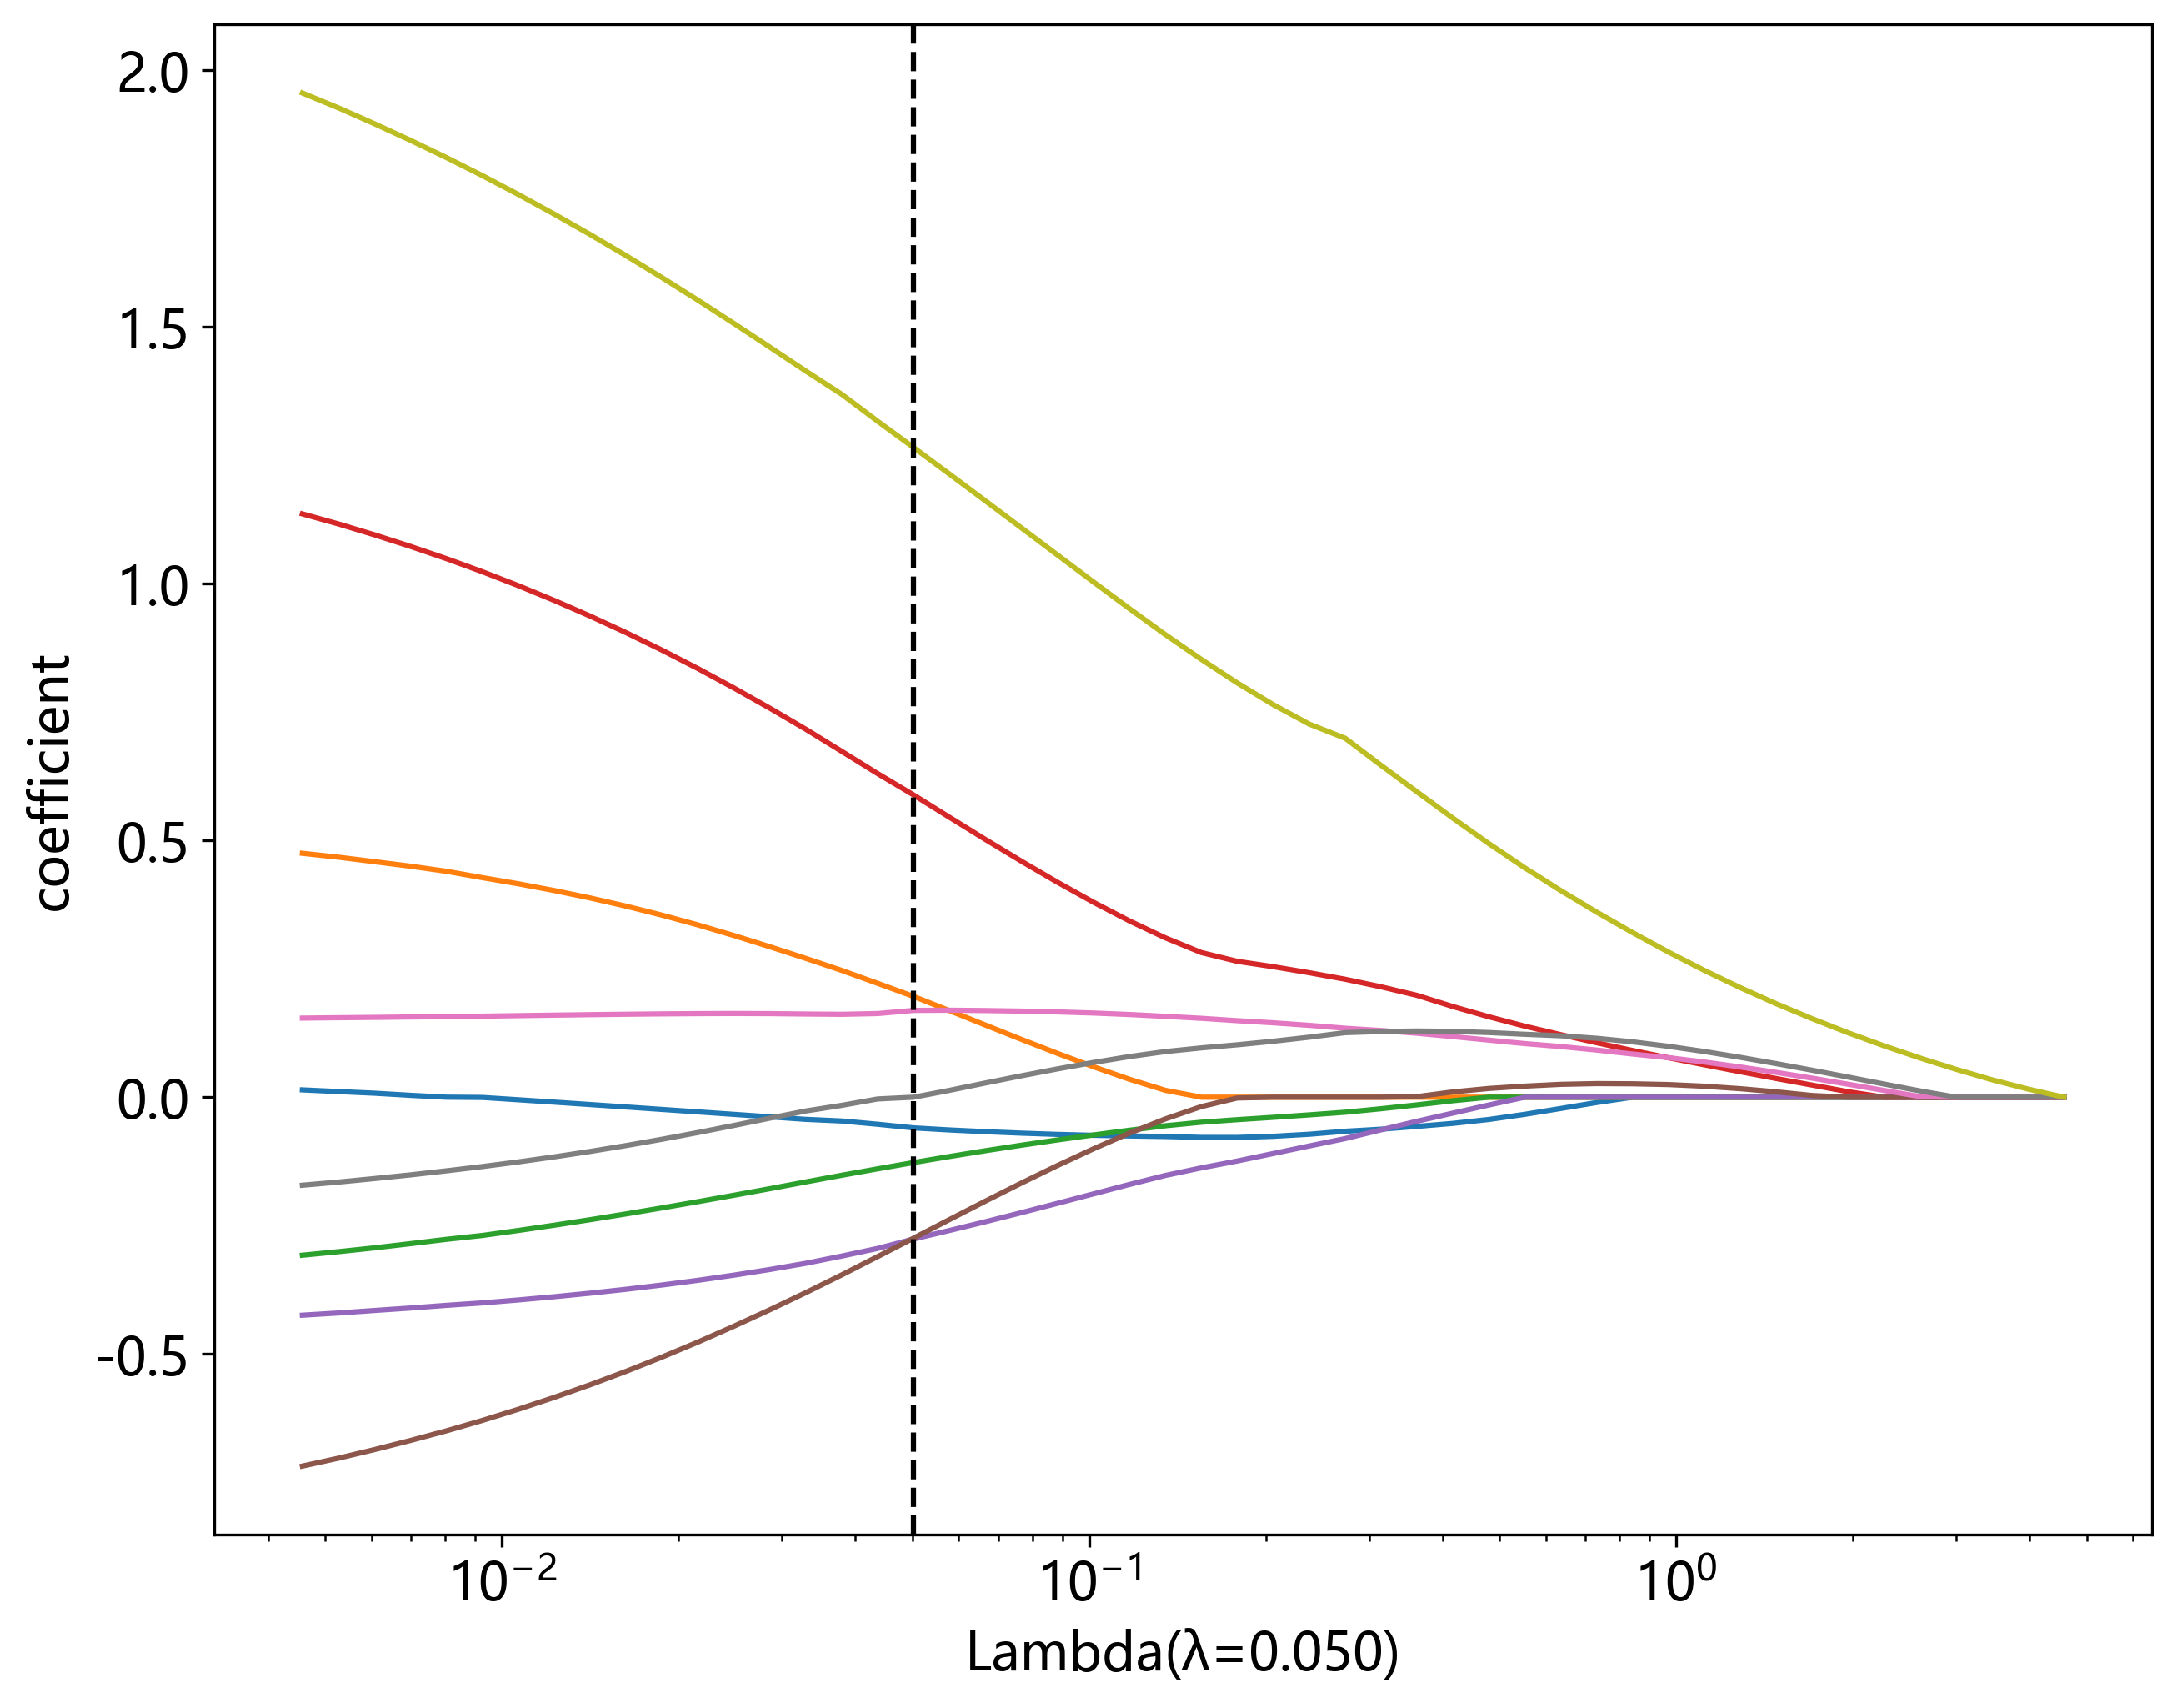

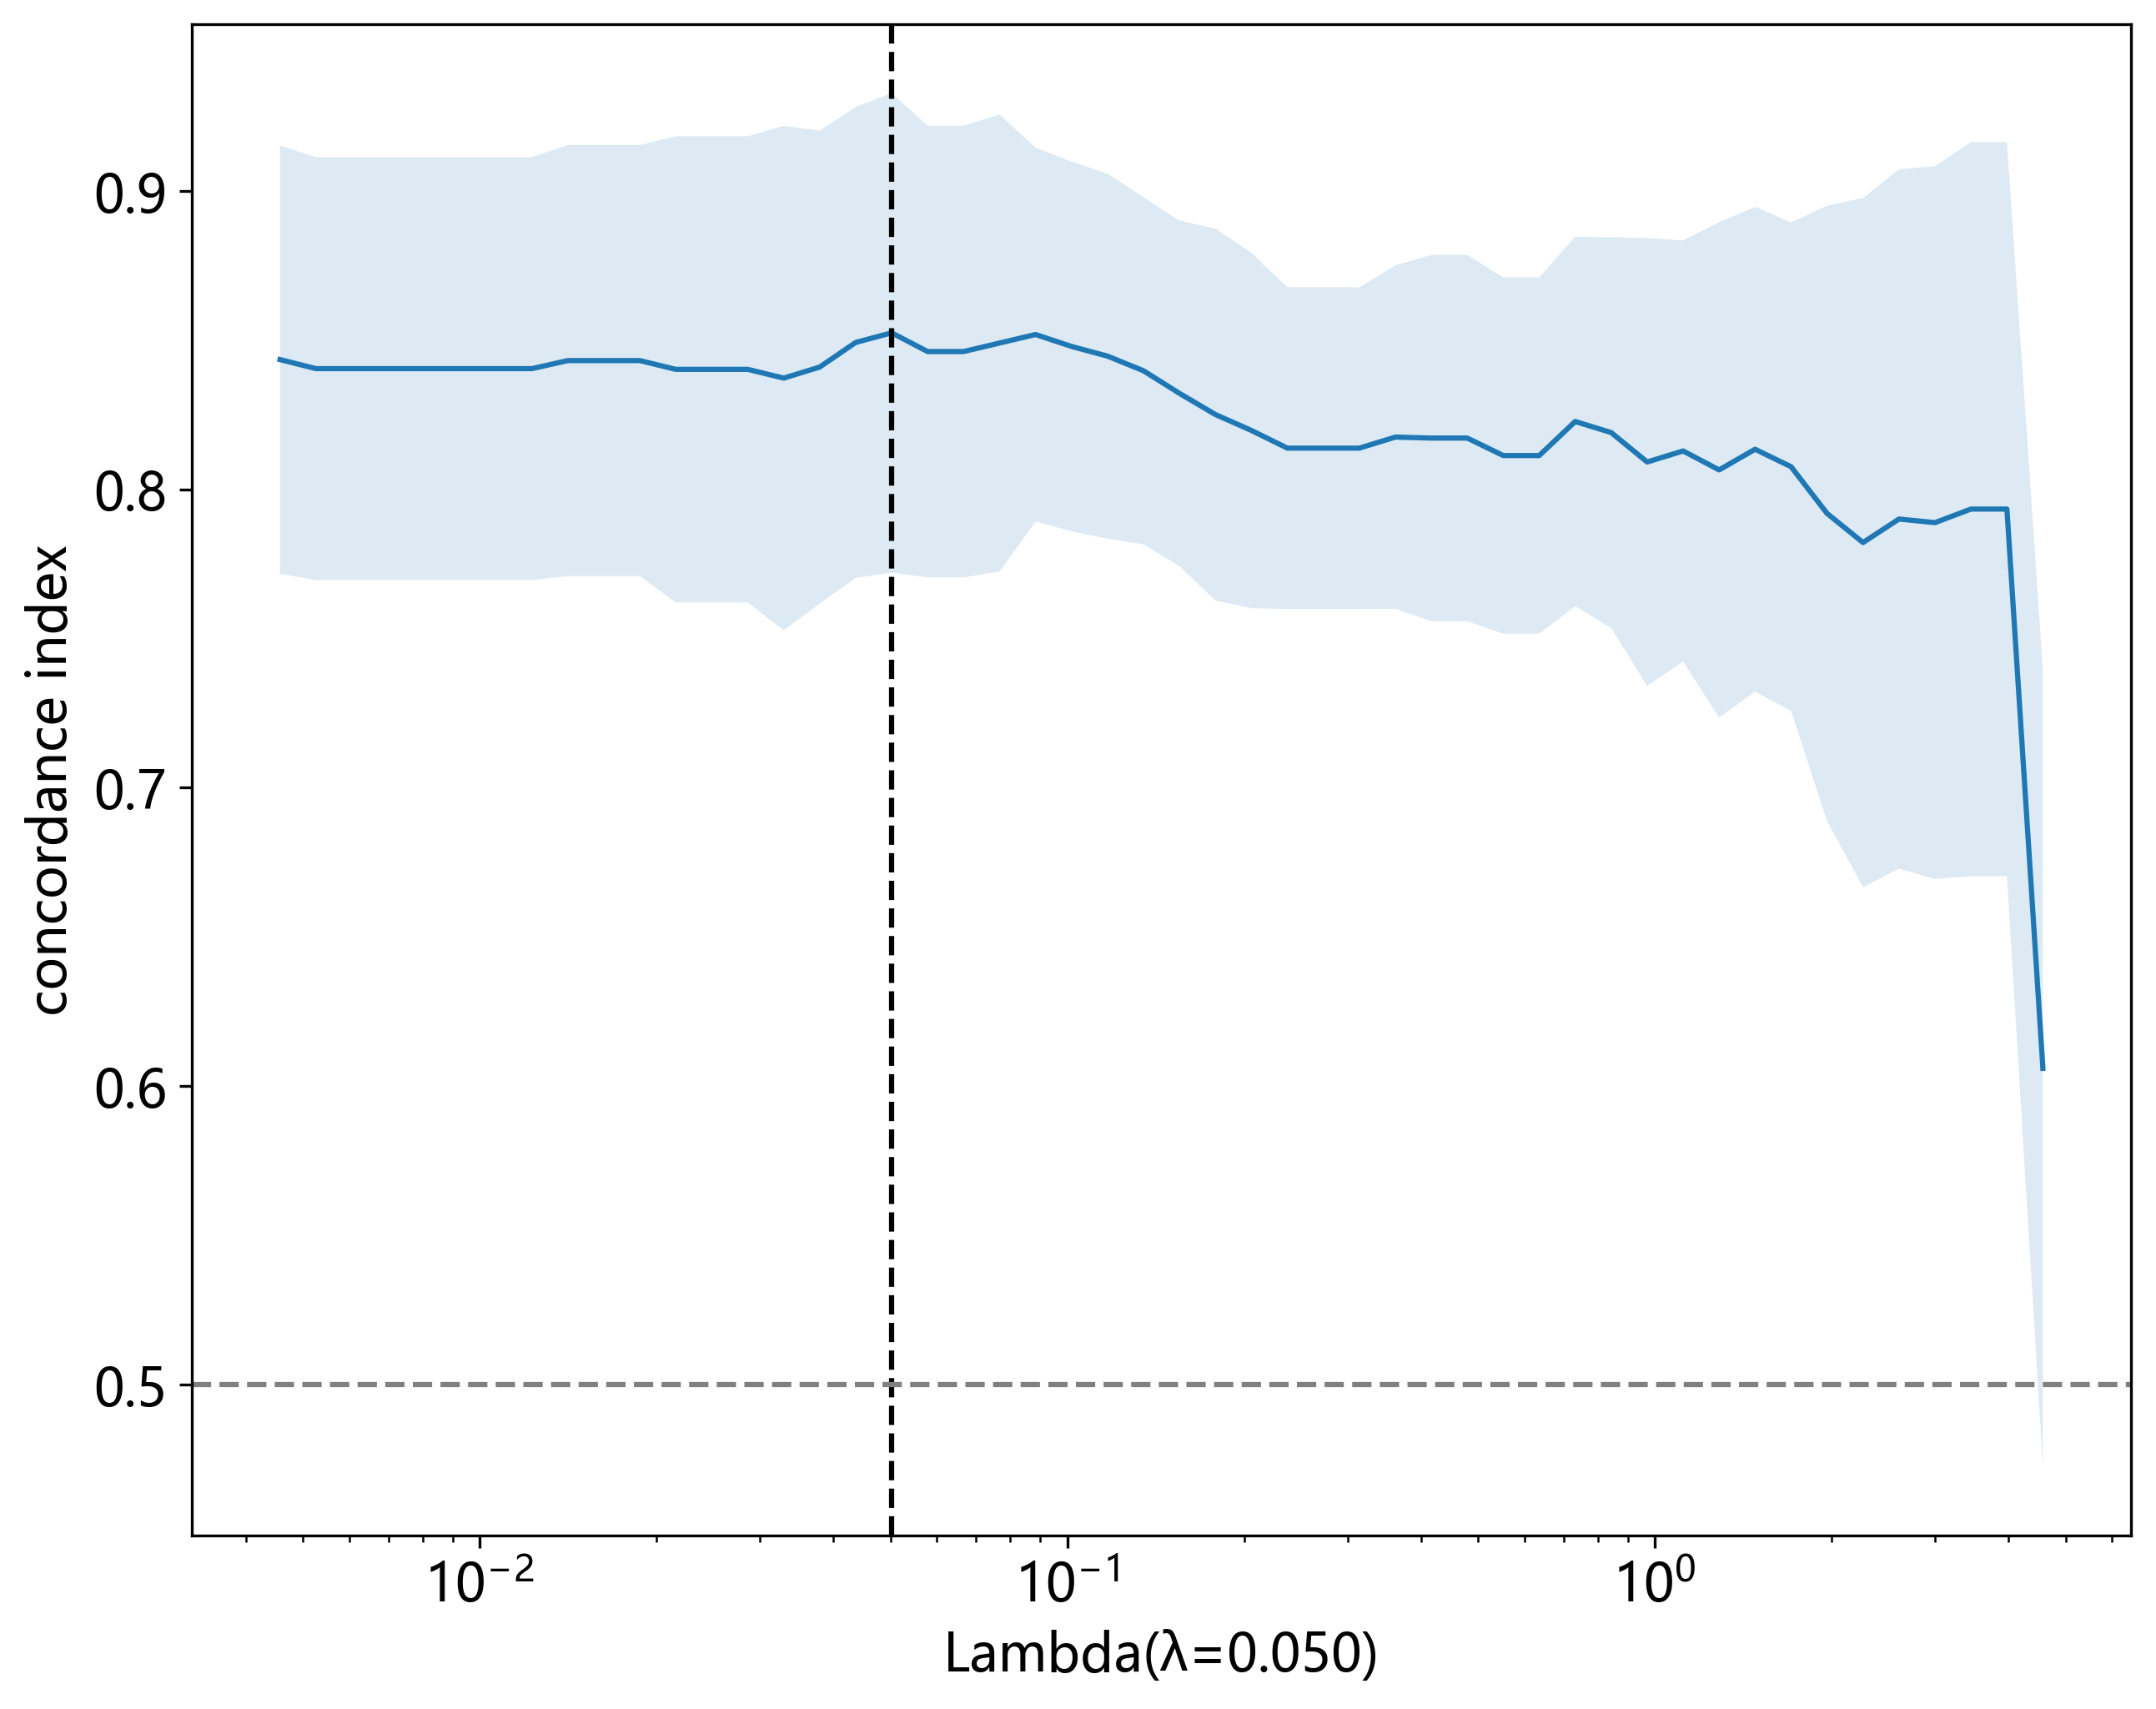

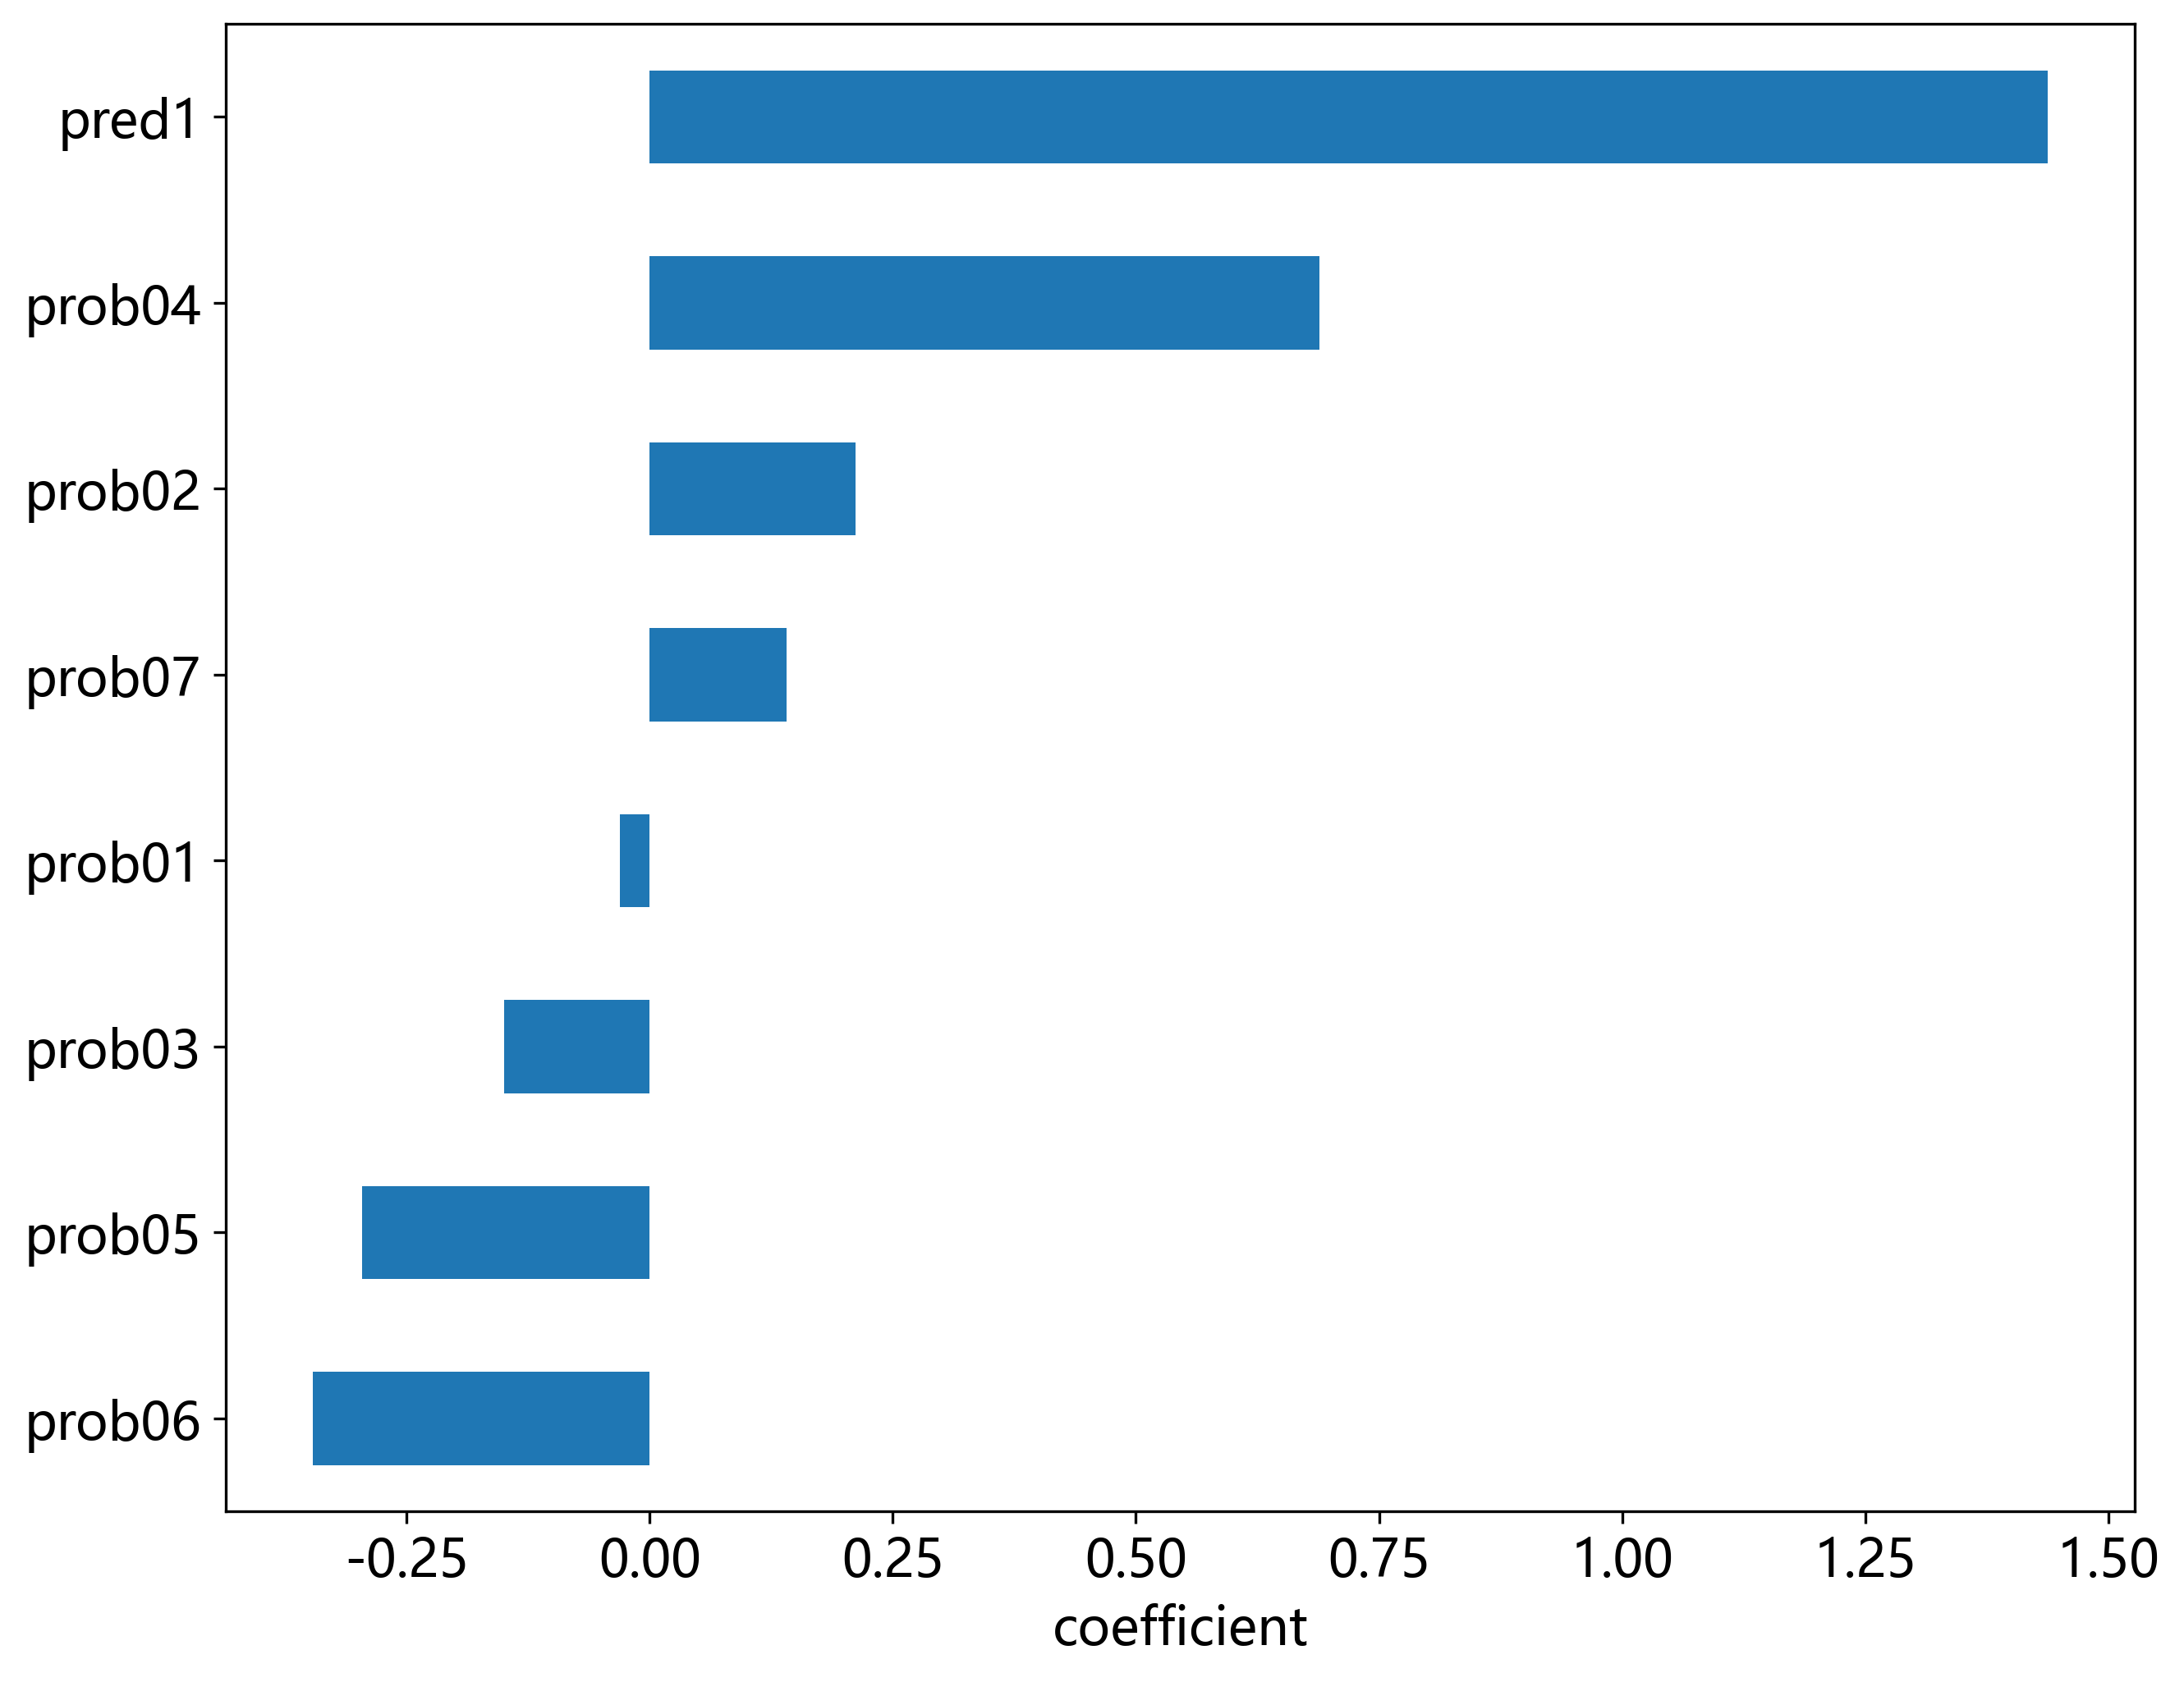

Survive = -0.346764 * prob06 -0.295672 * prob05 -0.149968 * prob03 -0.030245 * prob01 +0.140661 * prob07 +0.211531 * prob02 +0.688726 * prob04 +1.437903 * pred1


In [9]:
from onekey_algo.custom.components.survival import get_x_y_survival, lasso_cox_cv
COEF_THRESHOLD = 1e-6

X, y = get_x_y_survival(train_data, val_outcome=1, event_col=event_col, duration_col=duration_col)
sel_features = lasso_cox_cv(X, y, max_iter=200,  norm_X=False, prefix=f"{task_type}", l1_ratio=0.1, cv=10, ppoints=50)
# sel_features = lasso_cox_cv(X, y, max_iter=1000,  norm_X=False, prefix=f"{task}_", l1_ratio=0.8, cv=10)

In [10]:
train_data = train_data[['ID'] + list(sel_features.index) + [event_col, duration_col]]
for subset in subsets:
    val_datasets[subset] = val_datasets[subset][['ID'] + list(sel_features.index) + [event_col, duration_col]]
    val_datasets[subset].to_csv(f'features/{task_type}{subset}_cox.csv', index=False)

### 聚类分析

通过修改变量名，可以可视化不同相关系数下的相聚类分析矩阵。

注意：当特征特别多的时候（大于100），尽量不要可视化，否则运行时间会特别长。

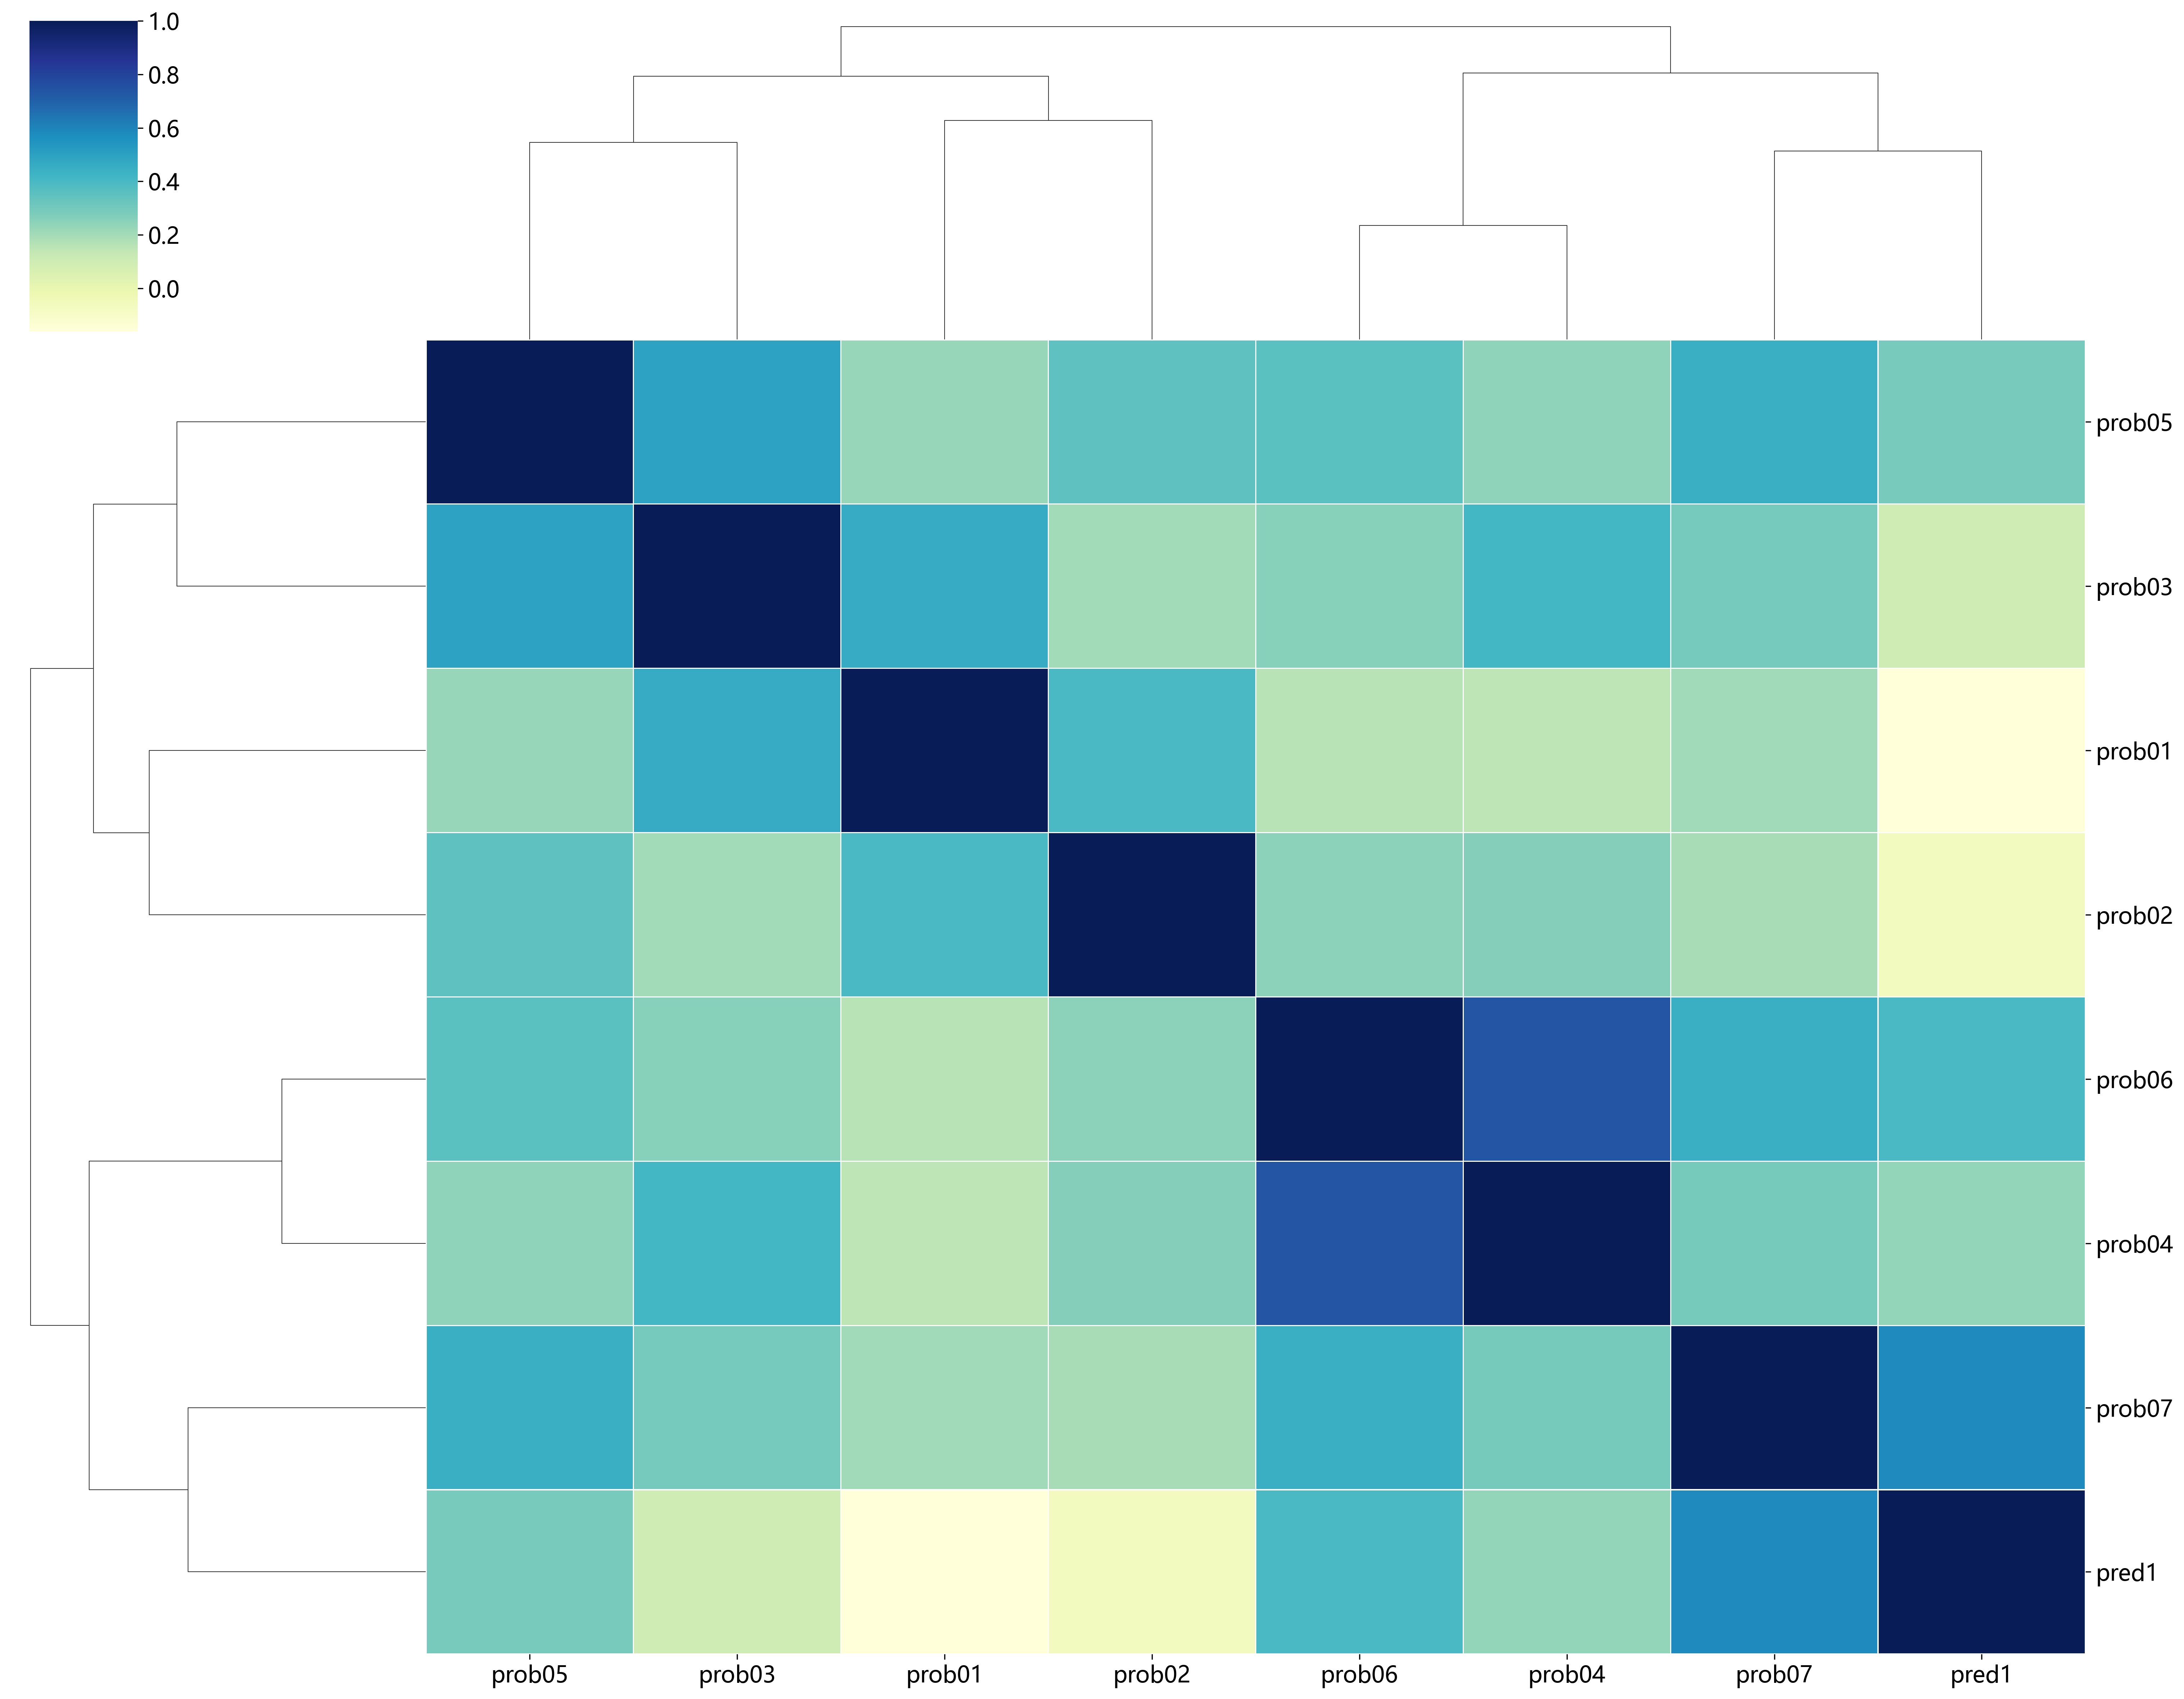

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

if train_data.shape[1] < 150:
    pp = sns.clustermap(train_data[[c for c in train_data.columns if c not in [event_col, duration_col]]].corr(corr_name), 
                        linewidths=.5, figsize=(20.0, 16.0), cmap='YlGnBu')
    plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
    plt.savefig(f'img/{task_type}feature_cluster.svg', bbox_inches = 'tight')

In [12]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.01)
cph.fit(train_data[[c for c in train_data.columns if c != 'ID']], duration_col=duration_col, event_col=event_col)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 115 total observations, 62 right-censored observations>
             duration col = 'OSTime'
                event col = 'OS'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 115
number of events observed = 53
   partial log-likelihood = -157.64
         time fit was run = 2024-02-07 06:17:15 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
prob06     -0.72       0.49       0.21            -1.12            -0.31                 0.33                 0.73
prob05     -0.46       0.63       0.22            -0.89            -0.03                 0.41                 0.97
prob03     -0.31       0.73       0.20            -0.71             0.09                 0.49                 1.09
prob01      0.06       1.06       0.21            -0.36             0.48                 0.70                 1.62
prob07      0.11       1.11       0.18            -0.24             0.45                 0.79                 1.57
prob02      0.39       1.48       0.23            -0.07             0.85                 0.93                 2.33
prob04      1.13       3.11       0.25             0.65             1.61                 1.92                 5.02
pred1       1.96       7.12       0.28             1.41             2.51                 4.11                12.33

            cmp to     z      p   -log2(p)
covariate                                 
prob06        0.00 -3.47 <0.005      10.89
prob05        0.00 -2.11   0.04       4.83
prob03        0.00 -1.52   0.13       2.96
prob01        0.00  0.29   0.77       0.37
prob07        0.00  0.60   0.55       0.87
prob02        0.00  1.67   0.10       3.39
prob04        0.00  4.62 <0.005      17.99
pred1         0.00  7.00 <0.005      38.56
---
Concordance = 0.86
Partial AIC = 331.29
log-likelihood ratio test = 108.32 on 8 df
-log2(p) of ll-ratio test = 63.36

In [13]:
print(cph.concordance_index_)
su = cph.summary[['exp(coef)', 'exp(coef) lower 95%', 'exp(coef) upper 95%', 'p']]
su.columns = ['HR', 'HR lower 95%', 'HR upper 95%', 'pvalue']
su.reset_index().to_csv(f'features/{task_type}features_HR.csv', index=False)
su

0.8560628089560919


,HR,HR lower 95%,HR upper 95%,pvalue
covariate,,,,
prob06,0.489,0.326,0.732,5.271e-04
prob05,0.629,0.409,0.968,3.524e-02
prob03,0.733,0.491,1.094,1.282e-01
prob01,1.063,0.700,1.616,7.733e-01
prob07,1.112,0.786,1.574,5.484e-01
prob02,1.476,0.934,2.333,9.547e-02
prob04,3.106,1.920,5.024,3.847e-06
pred1,7.119,4.111,12.329,2.475e-12


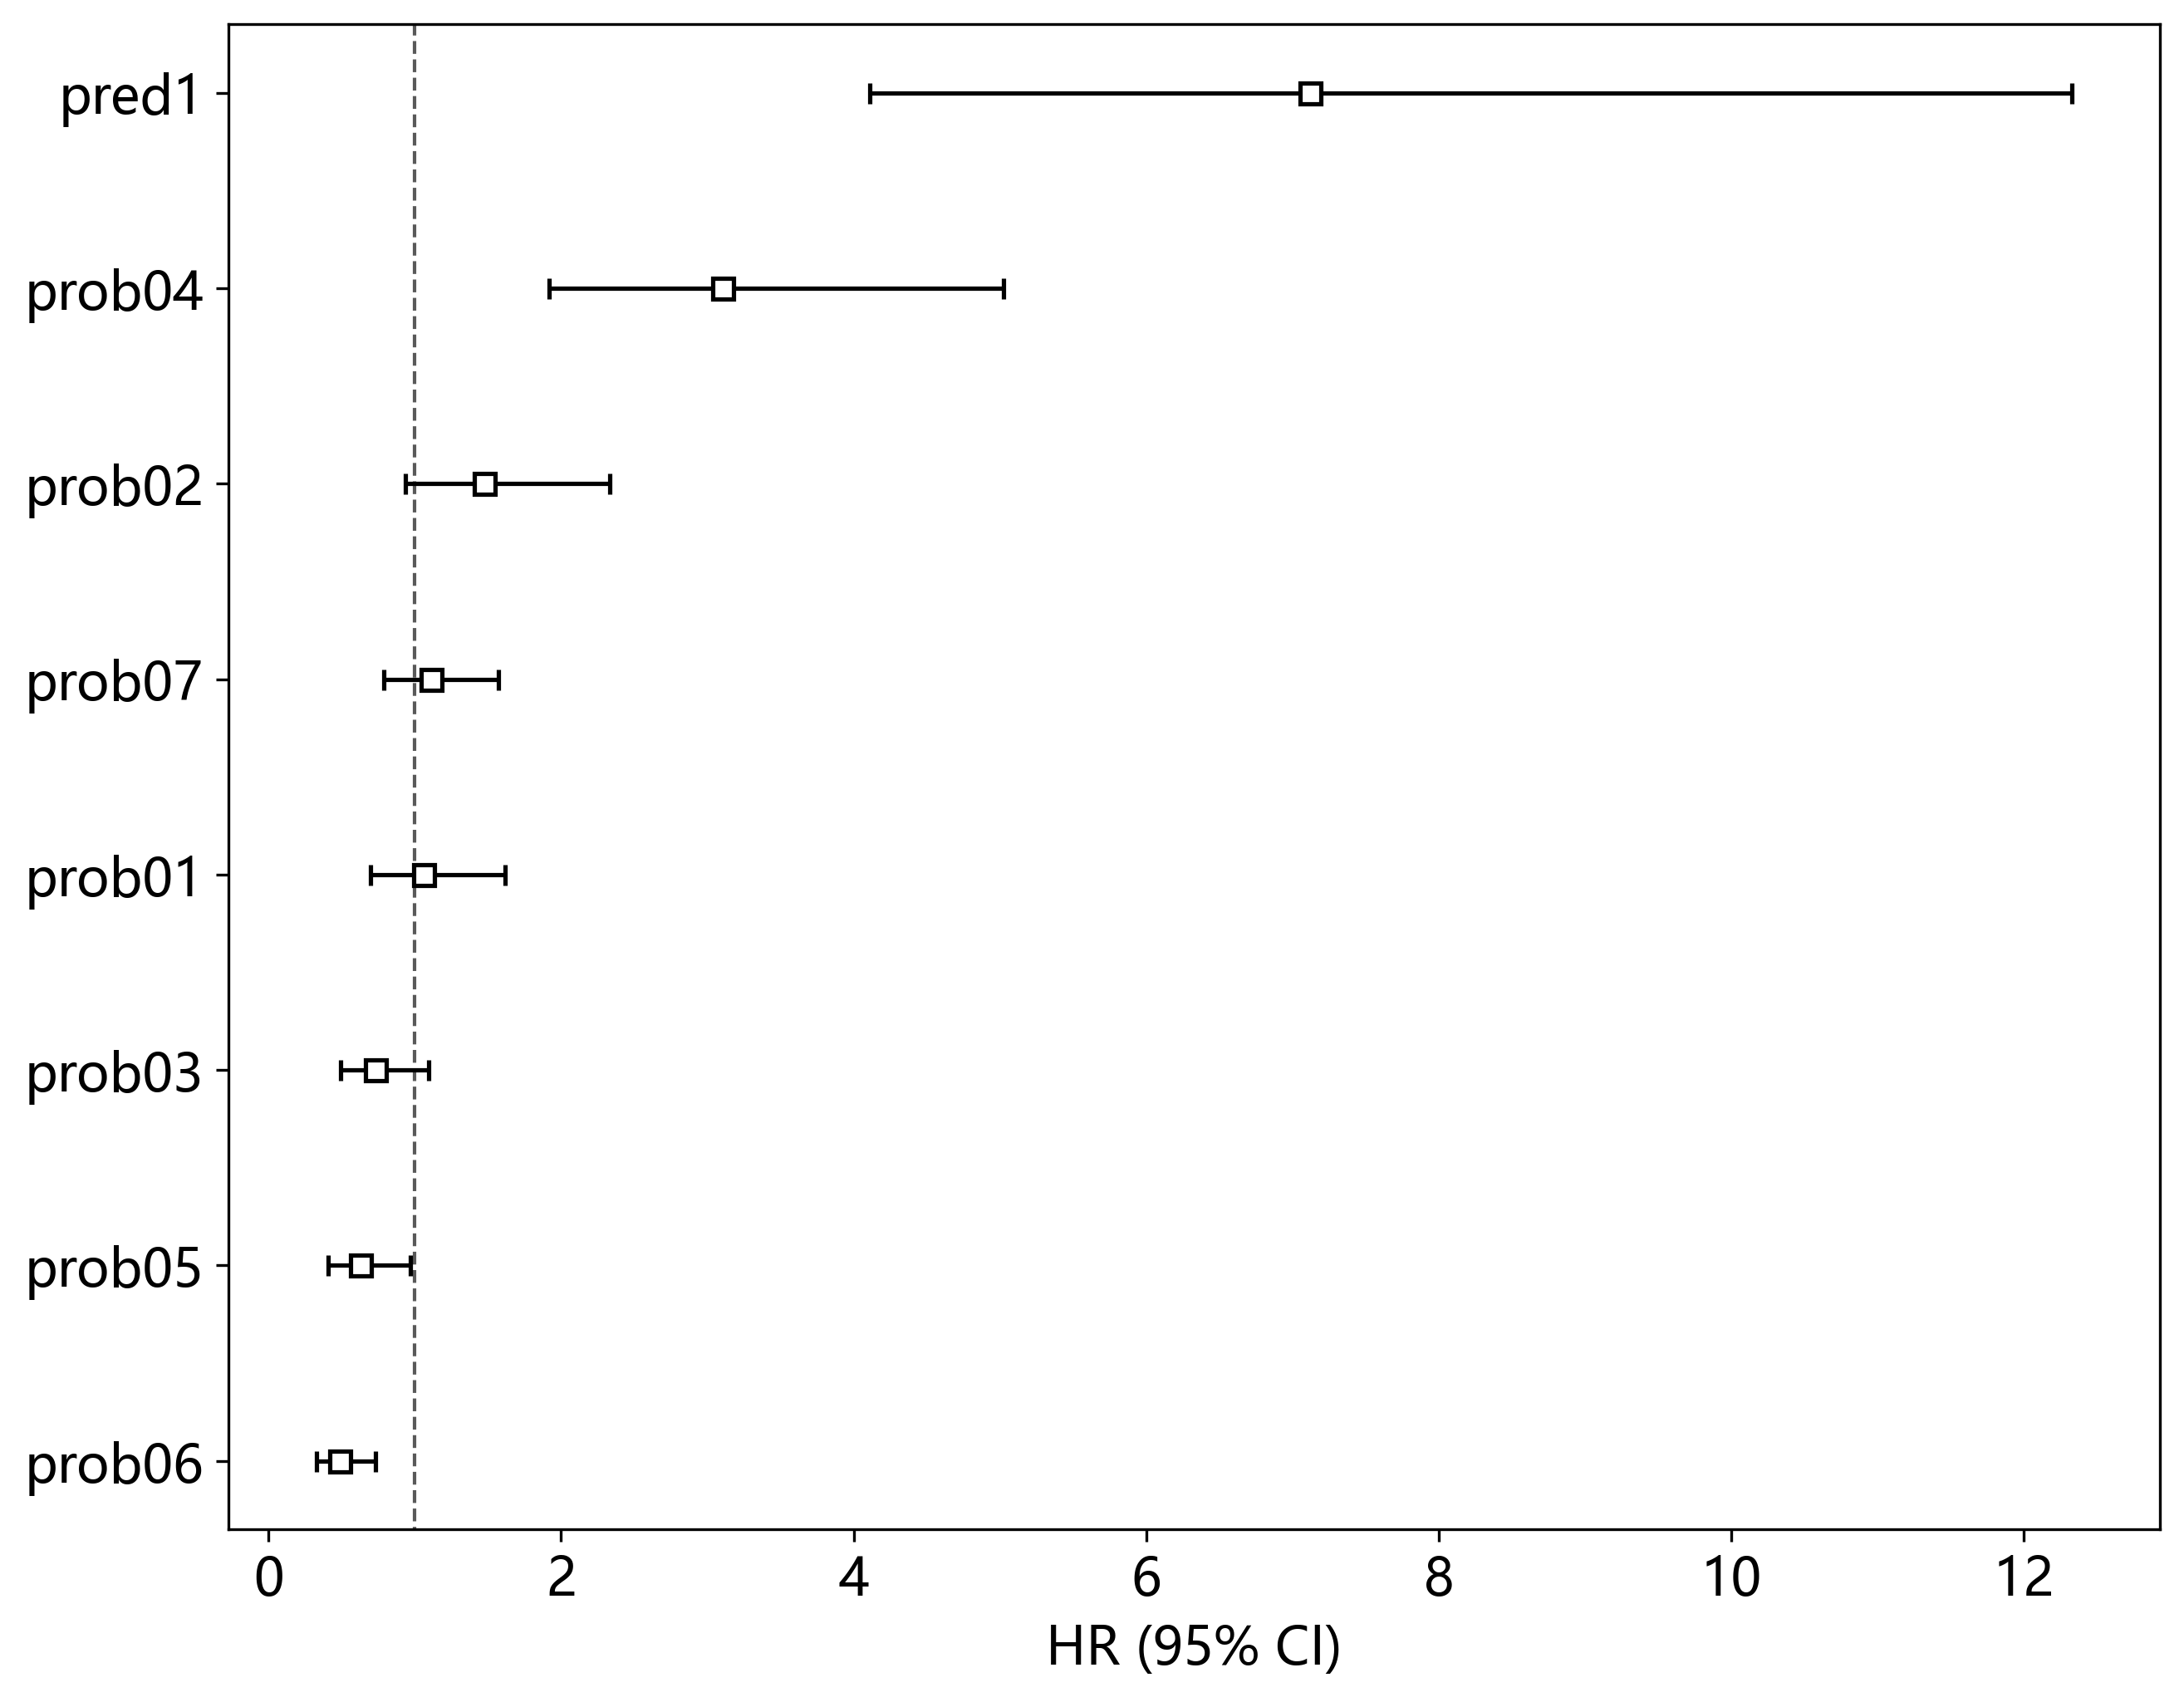

In [14]:
import matplotlib.pyplot as plt

cph.plot(hazard_ratios=True)
plt.savefig(f'img/{task_type}feature_pvalue.svg')
plt.show()

In [15]:
from onekey_algo.custom.components.ugly import drop_survival

def get_sel(cox_data, cph, drop_num):
    kid = drop_survival(cox_data, cph, drop_num=drop_num, is_drop_ids=False)
    print(set(cox_data['ID']) - set(kid['ID']))
    cox_data = pd.merge(cox_data, kid[['ID']], on='ID', how='inner')
    return cox_data
# for dn, subset in [(3, 'test')]:
#     val_datasets[subset + 'sel'] = get_sel(val_datasets[subset][[c for c in val_datasets[subset].columns if c not in ['group']]], cph, dn)

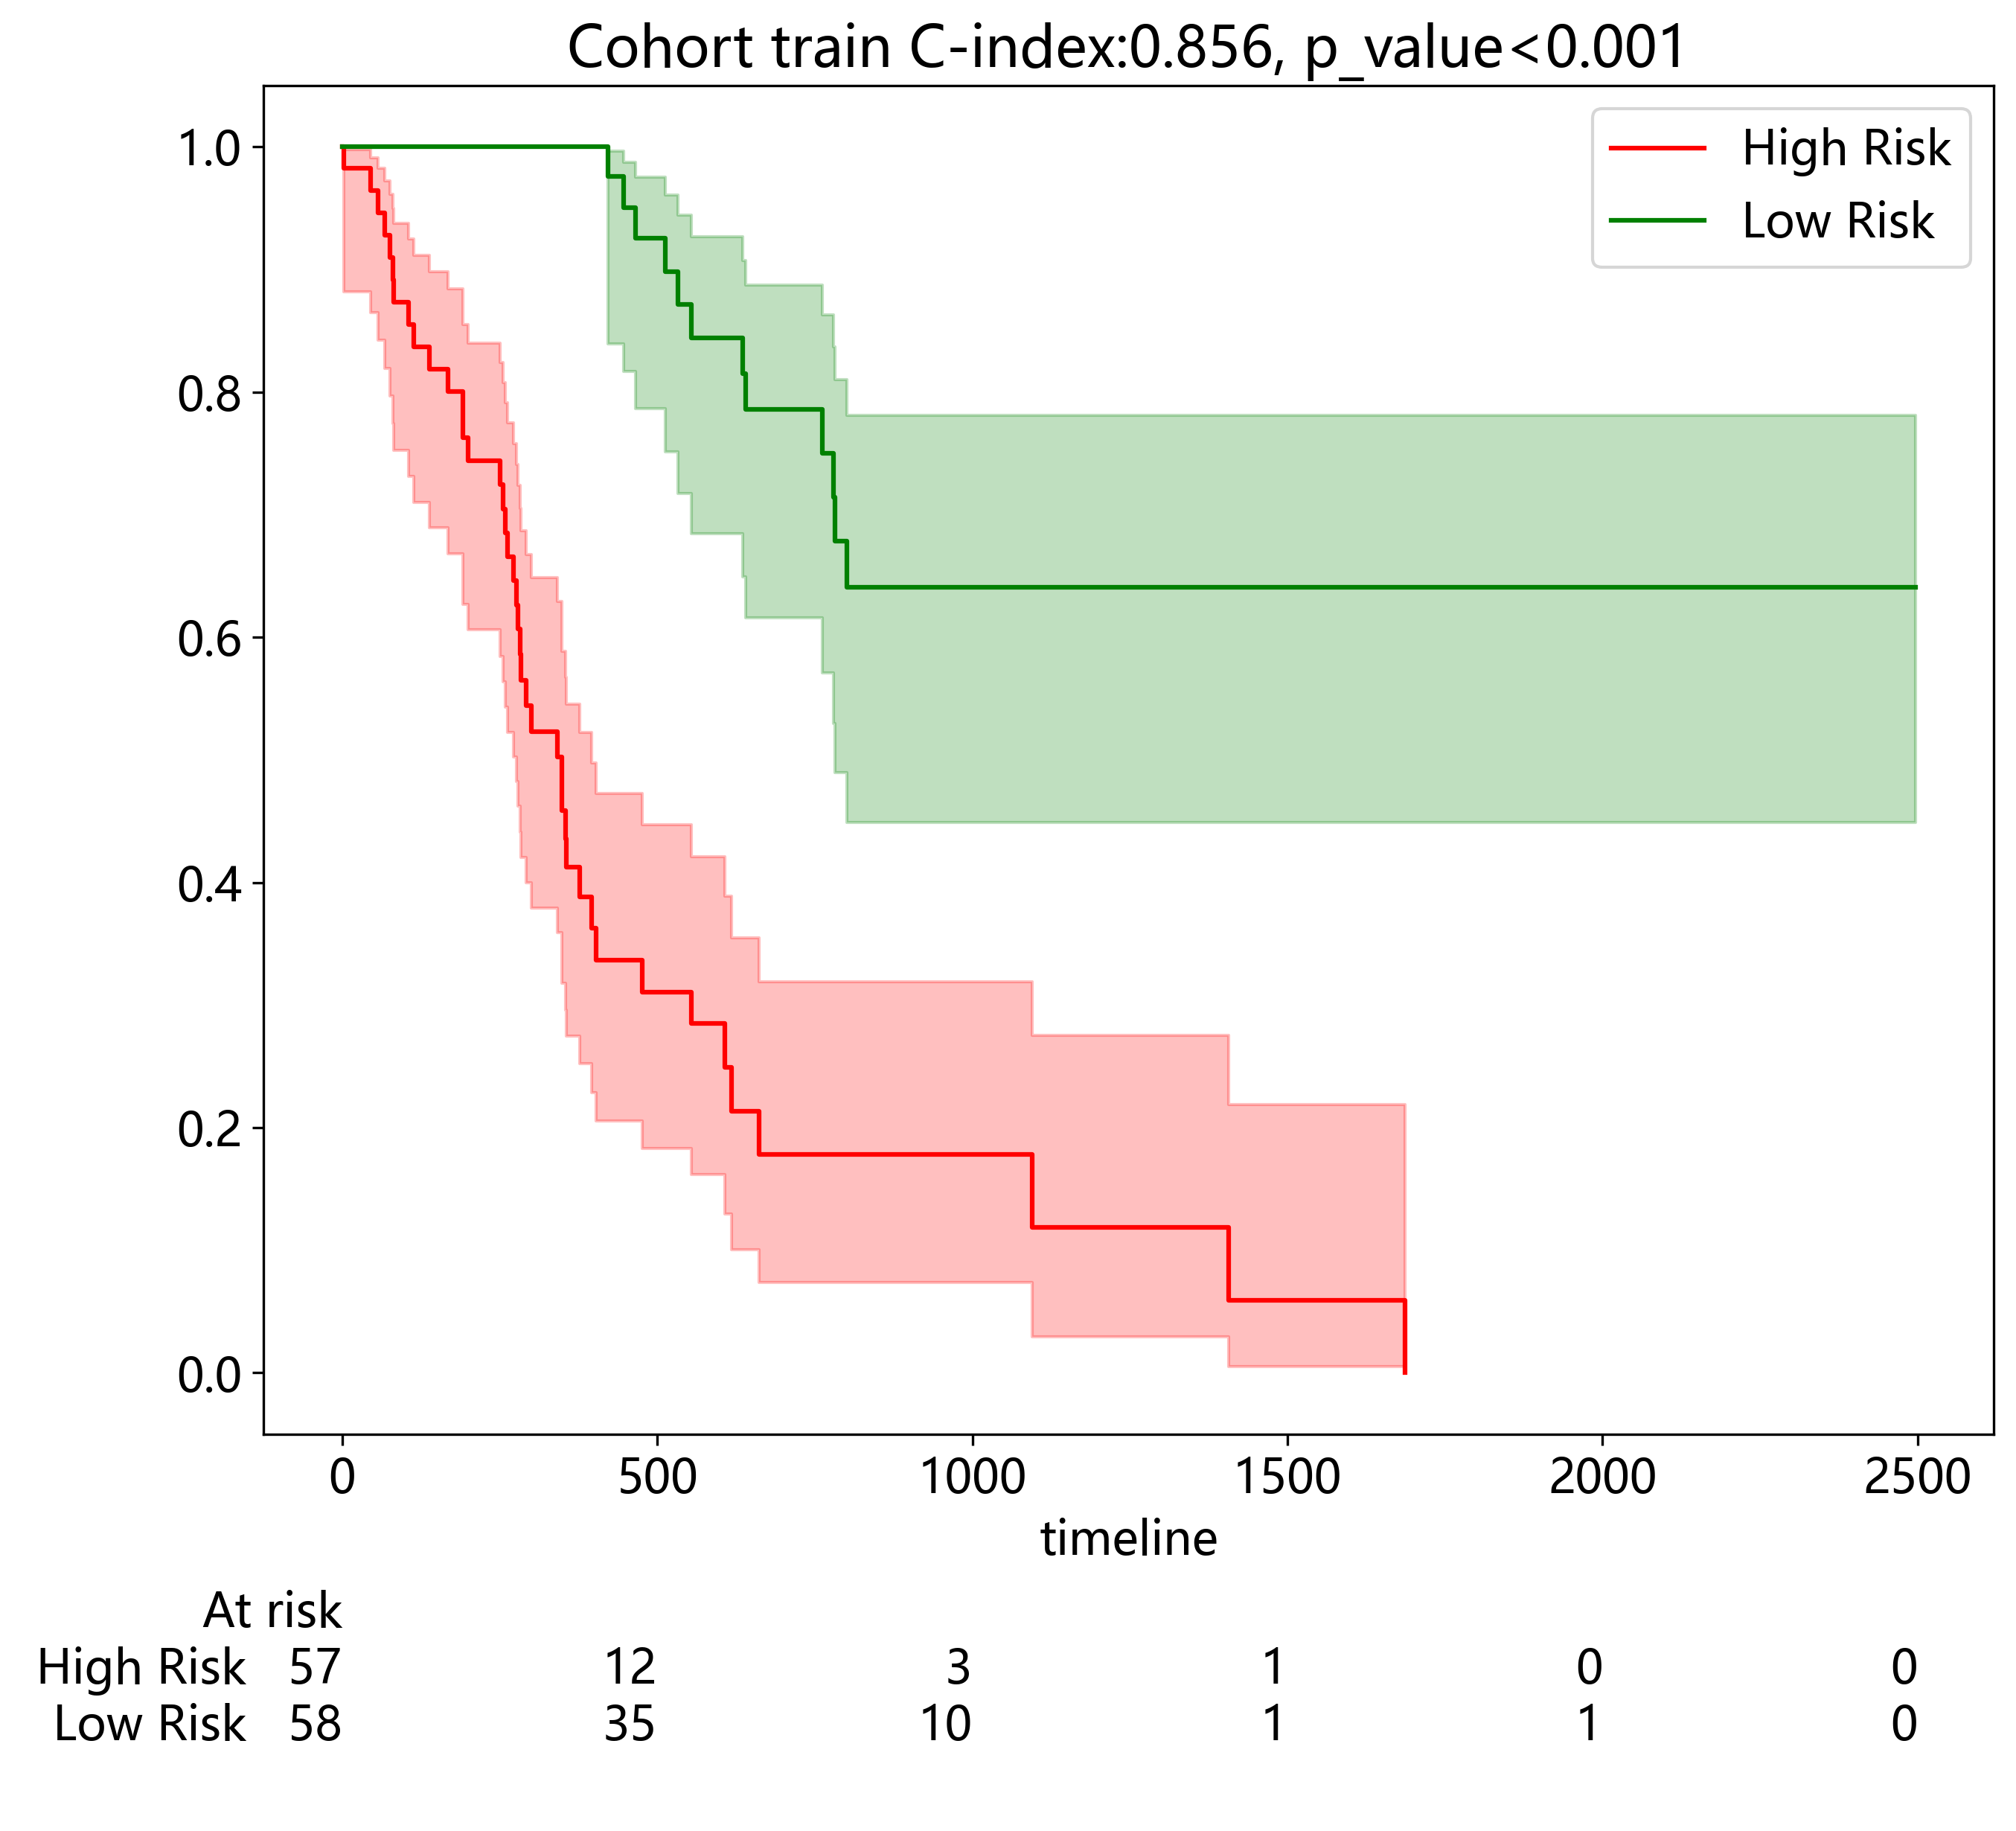

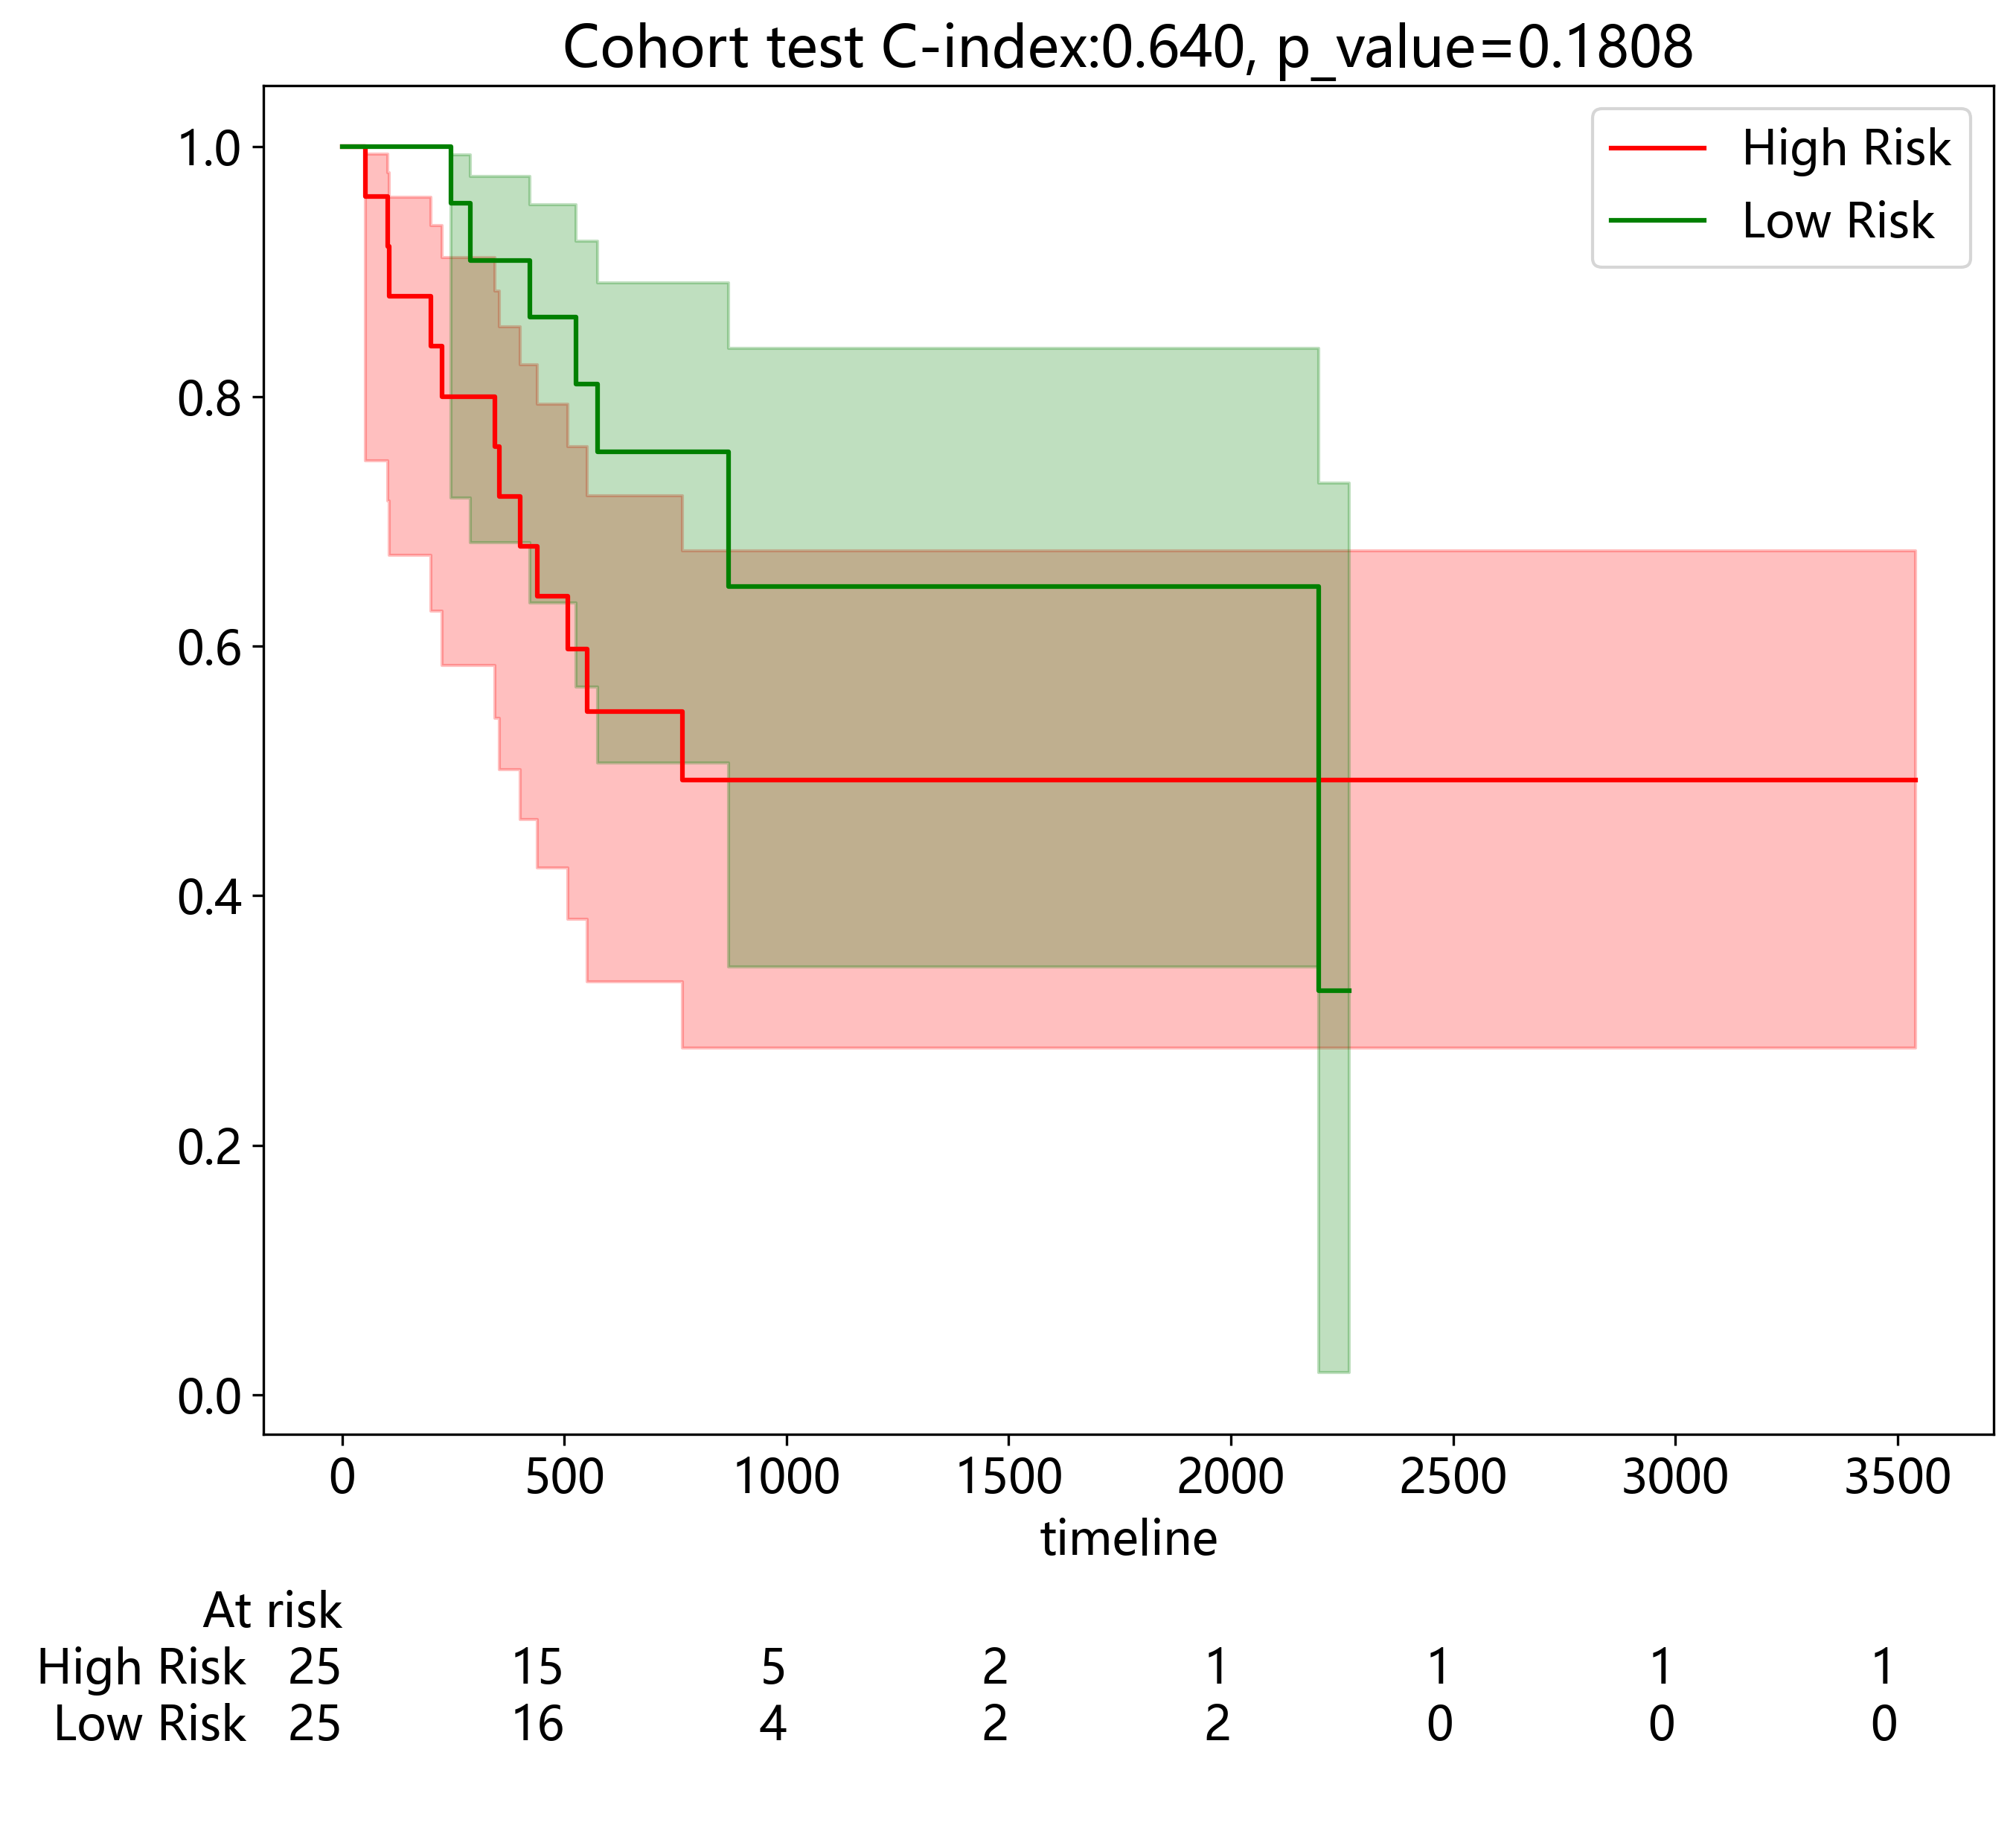

In [16]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

for subset, test_data in val_datasets.items():
    if subset == 'test_ex':
        continue
    c_index = cph.score(test_data[[c for c in test_data.columns if c != 'ID']], scoring_method="concordance_index")
#     y_pred = cph.predict_median(test_data[[c for c in test_data.columns if c != 'ID']])
#     cox_data = pd.concat([test_data, y_pred], axis=1)
#     mean = cox_data.describe()[0.5]['mean']
#     cox_data['HR'] = cox_data[0.5] < mean
    y_pred = cph.predict_partial_hazard(test_data[[c for c in test_data.columns if c != 'ID']])
    cox_data = pd.concat([test_data, y_pred], axis=1)
    mean = cox_data.describe()[0]['50%']
    cox_data['HR'] = cox_data[0] > mean
#     cox_data['HR'] = cox_data[0] > 1

    dem = (cox_data["HR"] == True)
    results = logrank_test(cox_data[duration_col][dem], cox_data[duration_col][~dem], 
                           event_observed_A=cox_data[event_col][dem], event_observed_B=cox_data[event_col][~dem])
    p_value = f'={results.p_value:.4f}' if results.p_value > 0.001 else '<0.001'
    plt.title(f"Cohort {subset} C-index:{c_index:.3f}, p_value{p_value}")
    if sum(dem):
        kmf_high = KaplanMeierFitter()
        kmf_high.fit(cox_data[duration_col][dem], event_observed=cox_data[event_col][dem], label="High Risk")
        kmf_high.plot_survival_function(color='r')
    if sum(~dem):
        kmf_low = KaplanMeierFitter()
        kmf_low.fit(cox_data[duration_col][~dem], event_observed=cox_data[event_col][~dem], label="Low Risk")
        kmf_low.plot_survival_function(color='g')
    add_at_risk_counts(kmf_high, kmf_low, rows_to_show=['At risk'])
    plt.savefig(f'img/{task_type}KM_{subset}.svg', bbox_inches='tight')
    plt.show()

ICI =  0.6262307262065023
E50 =  0.48656399957058494
ICI =  0.6775416108844784
E50 =  0.6127091003412034


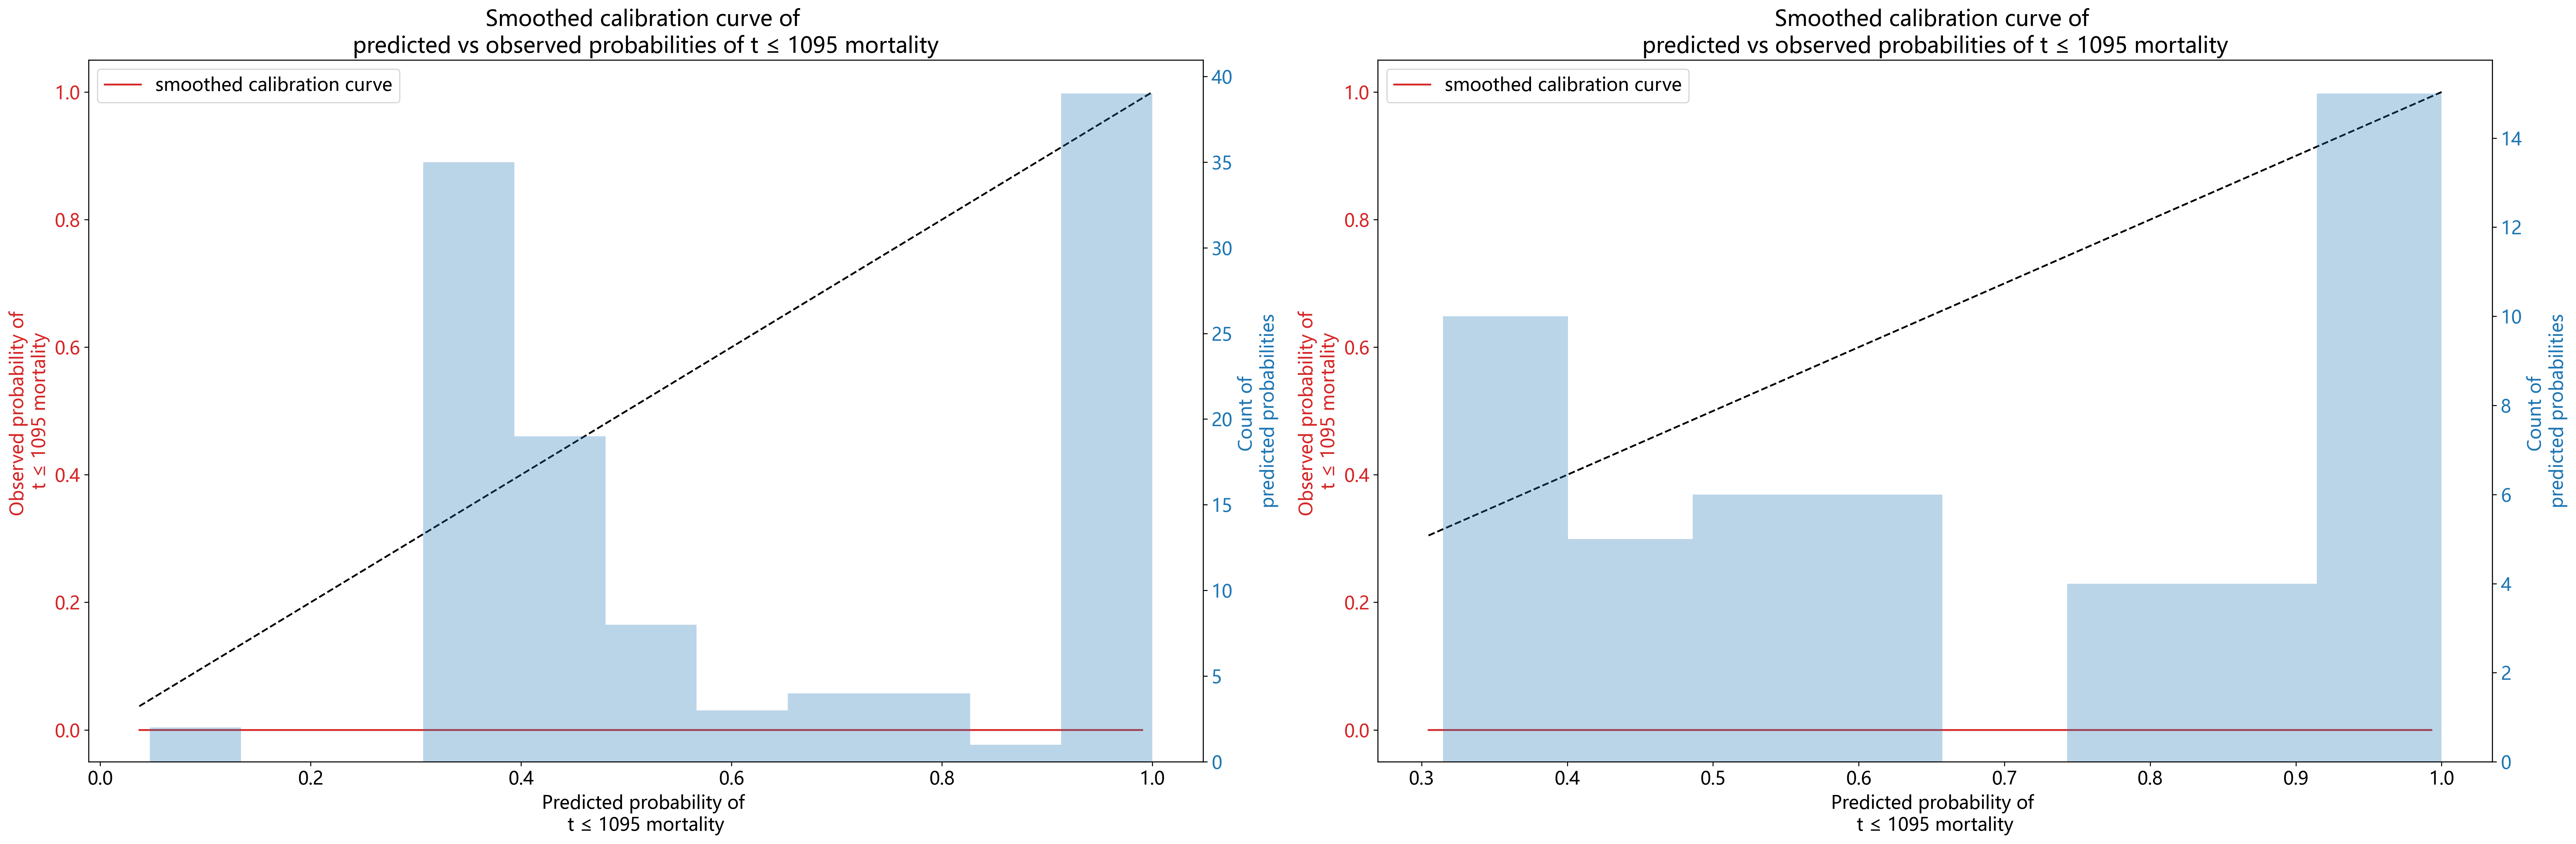

In [17]:
from lifelines.calibration import survival_probability_calibration
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
#训练集的校准曲线，t0 ( float ) – 评估事件发生概率的时间
survival_probability_calibration(cph, val_datasets['train'], t0=365*3, ax=axes[0])
#验证集的校准曲线
survival_probability_calibration(cph, val_datasets['test'], t0=365*3, ax=axes[1])
plt.savefig(f'img/{task_type}_cali.svg')
plt.show()

In [18]:
import os
import numpy as np

def get_prediction(model: CoxPHFitter, data, ID=None, **kwargs):
    hr = model.predict_partial_hazard(data)
    expectation = model.predict_expectation(data)
    
    predictions = pd.concat([hr, expectation], axis=1)
    predictions.columns = ['HR', 'expectation']
    if ID is not None:
        predictions = pd.concat([ID, hr, expectation], axis=1)
        predictions.columns = ['ID', 'HR', 'expectation']
    else:
        predictions = pd.concat([hr, expectation], axis=1)
        predictions.columns = ['HR', 'expectation']
    return predictions
os.makedirs('results', exist_ok=True)
kids = []
for subset, test_data in val_datasets.items():
    results = get_prediction(cph, test_data, ID=test_data['ID'])
    results.to_csv(f'results/{task_type}cox_predictions_{subset}.csv', index=False)
    results['group'] = subset
    kids.append(results[['ID', 'group']])